# Milestone 1 Fase 2


## 1 - Perkenalan


Nama: DESTI RATNA KOMALA

Batch : FTDS-020-RMT

Dataset : `Churn`

HuggingFace: [`churn-customer-prediction`](https://huggingface.co/spaces/destiratnakomala/Churn-Customer-Prediction)

### Judul


**"Pemodelan Deeplearning Framework memprediksi customer yang akan berhenti menggunakan produk (churn) pada perusahaan tersebut"**




### *Dataset* Information

Dataset ini berisi informasi mengenai:
- **resiko pelanggan**
        'churn_risk_score'
- **faktor demografik**
        'age', 'gender'
- **waktu**
      'joined_through_referral', 'last_visit_time',
- **Perilaku Pelanggan churn**
       'user_id', 'region_category', 'membership_category',
       'joining_date',  'preferred_offer_types',
       'medium_of_operation', 'internet_option',
       'days_since_last_login', 'avg_time_spent', 'avg_transaction_value',
       'avg_frequency_login_days', 'points_in_wallet', 'used_special_discount',
       'offer_application_preference', 'past_complaint', 'complaint_status',
       'feedback',

Skor resiko churn pelanggan atau `churn_risk_score` adalah status skor yang diberikan oleh perusahaan untuk mengetahui pelanggan mana yang akan **tidak churn (0)** dan yang akan **churn (1)**
Jika pelanggan berpotensi untuk churn, maka perusahaan harus membuat strategi agar pelanggan tersebut tidak churn.

### Objective




Sebuah perusahaan ingin meminimalisir resiko seorang customer untuk berhenti memakai produk yang mereka tawarkan. Oleh karena itu dibutuhkan pemodelan klasifikasi yang dapat memprediksi apakah customer tersebut akan churn atau tidak. Agar strategi bisnis perusahaan untuk mempertahankan customer tersebut dapat tepat sasaran.

## 2 - Import Libraries

Berikut adalah keseluruhan libraries yang digunakan pada analisis ini.Libraries ini dimaksudkan untuk mengimport data, cleaning data, analisis, data, visualisasi data, dan pembuatan model hingga pengujian model.

In [ ]:
!pip install feature-engine

In [ ]:
# Library Pengolahan Data
import numpy as np
import pandas as pd

# Library Visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Library Split Test dan Train
from sklearn.model_selection import train_test_split

# Feature Datetime extraction
import datetime as dt

# Library handling outlier
from feature_engine.outliers import Winsorizer

# Library Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import chi2

# Library Pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Library feature scaling dan feature encoding
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder


# Library pemodelan
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Input, concatenate, BatchNormalization, Dropout, Activation
from keras.callbacks import EarlyStopping


# Library Evaluasi Model
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score, f1_score

# Library Saving Model
import pickle

#tampilkan seluruh kolom pada data
pd.set_option('display.max_columns', None)

## 3 - Data Loading

Dataset yang digunakan berasal dari `github:H8-Assignments-Bay` dengan file [`customer churn`](https://github.com/H8-Assignments-Bay/p2-ftds020-rmt-ml1-destiratnakomala/blob/main/churn.csv)

Selanjutnya, upload data raw csv ke akun github dan panggil path data raw tersebut pada `https://raw.githubusercontent.com/destiratnakomala/Hacktiv8_Folder/main/churn.csv`

Variabel baru `df2` dibuat untuk meng-import dataset bertipe `.csv` tersebut

In [ ]:
#copy dataset
df2=pd.read_csv('https://raw.githubusercontent.com/destiratnakomala/Hacktiv8_Folder/main/churn.csv')

In [ ]:
#copy data awal
df=df2.copy()



---



In [ ]:
#tampilkan 10 data awal
df.head(10)

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,9f420209e7d129f3,29,F,NaN,No Membership,2017-04-05,Yes,Without Offers,NaN,Wi-Fi,22:29:49,4,1184.490000,38604.69,10.0,627.48000,Yes,Yes,Yes,No Information Available,Poor Website,1
1,ac6e97806267549e,50,M,NaN,Basic Membership,2017-03-31,Yes,Without Offers,Desktop,Fiber_Optic,15:44:56,11,338.150000,7665.66,17.0,575.97000,Yes,No,Yes,No Information Available,Poor Customer Service,1
2,a6aa19b1580eed4e,26,F,City,Silver Membership,2017-02-11,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,20:31:53,8,235.140000,37671.69,5.0,767.93000,Yes,No,Yes,No Information Available,Too many ads,0
3,aeee343277211c2f,63,F,Village,No Membership,2015-12-23,No,Credit/Debit Card Offers,Desktop,Fiber_Optic,14:28:05,10,56.670000,15678.14,11.0,590.22000,No,Yes,No,Not Applicable,Too many ads,1
4,82448b5c8ce6390c,64,M,Town,Silver Membership,2015-03-20,NaN,Gift Vouchers/Coupons,Smartphone,Wi-Fi,04:16:48,9,153.990000,8422.68,0.0,722.04000,Yes,No,No,Not Applicable,Poor Product Quality,0
5,96fbb6f63244b1f4,35,M,Town,Premium Membership,2016-08-16,No,Credit/Debit Card Offers,NaN,Wi-Fi,14:50:53,20,1397.318999,29664.01,28.0,782.49000,No,Yes,Yes,Unsolved,Poor Product Quality,0
6,a52bc51378ecb057,43,M,NaN,Gold Membership,2017-03-09,Yes,Gift Vouchers/Coupons,Smartphone,Mobile_Data,15:14:20,11,416.300000,13160.39,24.0,712.94000,Yes,No,No,Not Applicable,No reason specified,1
7,94f338d20bf0f2b2,15,M,City,No Membership,2016-09-11,No,Credit/Debit Card Offers,Smartphone,Wi-Fi,04:32:35,8,34.070000,9151.14,29.0,655.43000,Yes,No,No,Not Applicable,No reason specified,1
8,85c7996b17862e57,49,M,Town,Platinum Membership,2017-04-24,Yes,Without Offers,NaN,Fiber_Optic,18:26:30,3,650.120000,81628.48,11.0,0.00000,Yes,Yes,No,Not Applicable,Products always in Stock,0
9,8a1625846d7a198b,35,F,Town,Basic Membership,2016-12-01,Yes,Credit/Debit Card Offers,Desktop,Mobile_Data,07:58:44,5,106.230000,28232.59,16.0,984.93392,No,Yes,No,Not Applicable,Too many ads,1


In [ ]:
#tampilkan 10 data terakhir
df.tail(10)

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
37000,8a0fff47b7846031,25,F,Town,No Membership,2017-01-20,No,Gift Vouchers/Coupons,Smartphone,Wi-Fi,17:53:32,6,119.830000,13147.91,0.0,1019.382051,Yes,No,Yes,Solved in Follow-up,Poor Product Quality,1
37001,8832eec42dc0e347,38,M,Town,Silver Membership,2016-09-19,NaN,Credit/Debit Card Offers,Smartphone,Wi-Fi,17:42:11,19,34.790000,30820.83,23.0,631.830000,Yes,No,Yes,Unsolved,Poor Customer Service,1
37002,b9d9761f4d367c7a,49,F,City,No Membership,2017-12-12,NaN,Without Offers,Both,Wi-Fi,02:31:18,13,499.510000,17110.71,24.0,587.010000,Yes,No,No,Not Applicable,Poor Customer Service,1
37003,a38816e7522f5f7b,42,F,Town,Basic Membership,2017-07-05,Yes,Gift Vouchers/Coupons,Both,Wi-Fi,21:42:42,3,529.580000,42964.11,18.0,619.280000,Yes,Yes,No,Not Applicable,Poor Product Quality,1
37004,8968d0458164dda9,19,F,Town,Gold Membership,2016-07-17,Yes,Without Offers,Smartphone,Fiber_Optic,22:03:48,21,119.960000,14218.43,7.0,781.840000,Yes,No,No,Not Applicable,Too many ads,0
37005,924e9c06f0c73817,36,M,Town,Gold Membership,2015-03-05,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,09:32:50,15,199.330000,29455.29,9.0,846.520000,Yes,Yes,No,Not Applicable,User Friendly Website,0
37006,90e22286ac0acf04,27,F,City,Gold Membership,2017-01-15,Yes,Without Offers,Desktop,Wi-Fi,02:28:52,15,368.500000,27038.47,8.0,835.980000,No,Yes,No,Not Applicable,Reasonable Price,0
37007,9329a6297407334a,20,M,NaN,Gold Membership,2015-07-11,Yes,Without Offers,NaN,Mobile_Data,17:50:38,13,272.130000,39305.35,27.0,714.900000,Yes,Yes,Yes,Solved,Poor Customer Service,0
37008,a4403ddda8fcf9f3,38,F,City,Gold Membership,2016-05-25,Yes,Without Offers,Desktop,Wi-Fi,17:07:57,-999,65.070000,46108.73,6.0,744.990000,No,Yes,No,Not Applicable,Poor Website,0
37009,93b5d0330d24fa15,36,M,Town,Gold Membership,2016-10-18,NaN,Without Offers,Both,Fiber_Optic,03:50:49,3,972.776679,26905.49,22.0,700.930000,Yes,No,Yes,No Information Available,Poor Customer Service,1


In [ ]:
#cek ukuran data
df.shape

(37010, 22)

In [ ]:
#Tampilkan data unik pada tiap kolom
df.nunique()

user_id                         36992
age                                55
gender                              2
region_category                     3
membership_category                 6
joining_date                     1096
joined_through_referral             2
preferred_offer_types               3
medium_of_operation                 3
internet_option                     3
last_visit_time                 30101
days_since_last_login              27
avg_time_spent                  24243
avg_transaction_value           36894
avg_frequency_login_days          971
points_in_wallet                23564
used_special_discount               2
offer_application_preference        2
past_complaint                      2
complaint_status                    5
feedback                            9
churn_risk_score                    2
dtype: int64

In [ ]:
# menampilkan fitur pada df
df.columns

Index(['user_id', 'age', 'gender', 'region_category', 'membership_category',
       'joining_date', 'joined_through_referral', 'preferred_offer_types',
       'medium_of_operation', 'internet_option', 'last_visit_time',
       'days_since_last_login', 'avg_time_spent', 'avg_transaction_value',
       'avg_frequency_login_days', 'points_in_wallet', 'used_special_discount',
       'offer_application_preference', 'past_complaint', 'complaint_status',
       'feedback', 'churn_risk_score'],
      dtype='object')

In [ ]:
#tampilkan default unique
df['churn_risk_score'].unique()

array([1, 0])

In [ ]:
#Tampilkan informasi data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37010 entries, 0 to 37009
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   user_id                       37010 non-null  object 
 1   age                           37010 non-null  int64  
 2   gender                        36951 non-null  object 
 3   region_category               31579 non-null  object 
 4   membership_category           37010 non-null  object 
 5   joining_date                  37010 non-null  object 
 6   joined_through_referral       31568 non-null  object 
 7   preferred_offer_types         36722 non-null  object 
 8   medium_of_operation           31615 non-null  object 
 9   internet_option               37010 non-null  object 
 10  last_visit_time               37010 non-null  object 
 11  days_since_last_login         37010 non-null  int64  
 12  avg_time_spent                37010 non-null  float64
 13  a

Fitur waktu/tanggal pada `joining_data` dan `last_visit_time` seharusnya bertipe data waktu (`datetime`). Oleh karena itu, perlu dilakukan pengubahan data objek ke datetime.

In [ ]:
# Mengubah fitur objek ke tipe data waktu
df['joining_date'] = pd.to_datetime(df['joining_date'], format='%Y-%m-%d')
df['last_visit_time'] = pd.to_datetime(df['last_visit_time'], format='%H:%M:%S')

In [ ]:
#cek apakah terdapat missing value
df.isnull().sum()

user_id                            0
age                                0
gender                            59
region_category                 5431
membership_category                0
joining_date                       0
joined_through_referral         5442
preferred_offer_types            288
medium_of_operation             5395
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                   0
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_risk_score                   0
dtype: int64

In [ ]:
#mengecek apakah terdapat data terduplikasi?
df.duplicated().sum()

18



---


***Notes Hasil Data Loading:***
- Data ini memiliki 37010 baris dan 22 kolom
- Terdapat 15 kolom objek/kategorikal, 3 kolom integer dan 4 kolom float
- Terdapat fitur waktu/tanggal pada dataset ini, diantarannya: sehingga perlu diekstrak sebelum dilakukan training.
- Terdapat missing values pada `gender`, `religion_category`, `joined_through_referral`, `preferred_offer_types`, dan `medium_of_operation`
- terdapat 18 data terduplikasi
---



## 4 - Exploratory Data Analysis (EDA)

Selanjutnya dilakukan EDA untuk melakukan eksplorasi data customer churn lebih lanjut. sebaiknya data disimpan di variabel baru agar data df tetap terjaga kelengkapan datanya.

In [ ]:
#salin data df
df_eda=df.copy()

### 4-1 Mengubah tipe objek menjadi datetime

Berdasarkan data loading yang telah dilakukan, diketahui bahwa pada tipe data pada 'joining_date' dan `last_time_visit` belum sesuai. Sehingga perlu dilakukan pengubahan tipe data.

In [ ]:
# Mengubah tipe data joining date dan last time visit ke datetime
df['joining_date'] = pd.to_datetime(df['joining_date'], format='%Y-%m-%d')
df['last_visit_time'] = pd.to_datetime(df['last_visit_time'], format='%H:%M:%S')
df_eda['joining_date'] = pd.to_datetime(df_eda['joining_date'], format='%Y-%m-%d')
df_eda['last_visit_time'] = pd.to_datetime(df_eda['last_visit_time'], format='%H:%M:%S')

In [ ]:
#tampilkan info data tersebut
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37010 entries, 0 to 37009
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   user_id                       37010 non-null  object        
 1   age                           37010 non-null  int64         
 2   gender                        36951 non-null  object        
 3   region_category               31579 non-null  object        
 4   membership_category           37010 non-null  object        
 5   joining_date                  37010 non-null  datetime64[ns]
 6   joined_through_referral       31568 non-null  object        
 7   preferred_offer_types         36722 non-null  object        
 8   medium_of_operation           31615 non-null  object        
 9   internet_option               37010 non-null  object        
 10  last_visit_time               37010 non-null  datetime64[ns]
 11  days_since_last_login       

Semua tipe data sudah sesuai dengan datanya. Berdasarkan informasi tersebut, didapatkan bahwa terdapat 2 kolom bertipe datetime64[ns], 4 kolom bertipe float64, 3 kolom bertipe int64 dan 13 kolom bertipe object

### 4-2 Statistik Deskriptif Numerik

In [ ]:
#statistik deskriptif awal
df_eda.describe().T

,count,mean,std,min,25%,50%,75%,max
age,37010.0,37.120697,15.866834,10.00,23.0000,37.000,51.0000,64.000000
days_since_last_login,37010.0,-41.943502,228.875324,-999.00,8.0000,12.000,16.0000,26.000000
avg_time_spent,37010.0,279.201356,330.017336,0.00,60.1225,161.770,356.5250,3235.578521
avg_transaction_value,37010.0,29272.430216,19445.963492,800.46,14177.8350,27554.485,40858.6725,99914.050000
avg_frequency_login_days,37010.0,14.659540,9.478756,0.00,7.0000,14.000,22.0000,73.061995
points_in_wallet,37010.0,623.590885,270.218956,0.00,574.2200,680.400,756.9900,2069.069761
churn_risk_score,37010.0,0.540881,0.498333,0.00,0.0000,1.000,1.0000,1.000000


Observasi:

Berdasarkan deskripsi statistik tersebut, dapat disimpulkan bahwa:
- rata-rata umur pada dataset ini adlaah 37 tahun dengan range dari 10 tahun hingga 64 tahun. Dari nilai mean dan mediannya, dapat dikatakan bahwa `age` berdistribusi normal karena nilai mean dan mediannya memiliki nilai selisih yang sangat kecil


### 4-3 Statistik Deskriptif Kategorikal/Objek

In [ ]:
#statistik deskriptif data kategorikal/objek
df_eda.describe(include = ['O']).T

,count,unique,top,freq
user_id,37010,36992,b749631fc10ff0da,2
gender,36951,2,F,18497
region_category,31579,3,Town,14135
membership_category,37010,6,Basic Membership,7727
joined_through_referral,31568,2,No,15846
preferred_offer_types,36722,3,Gift Vouchers/Coupons,12357
medium_of_operation,31615,3,Desktop,13917
internet_option,37010,3,Wi-Fi,12417
used_special_discount,37010,2,Yes,20353
offer_application_preference,37010,2,Yes,20449


In [ ]:
#Panggil data numerik dan kategorikal

eda_num_columns = df_eda.select_dtypes(include=np.number).columns.tolist()
eda_cat_columns = df_eda.select_dtypes(include=['object']).columns.tolist()

print('Numerical Columns : ', eda_num_columns)
print('Categorical Columns : ', eda_cat_columns)

Numerical Columns :  ['age', 'days_since_last_login', 'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet', 'churn_risk_score']
Categorical Columns :  ['user_id', 'gender', 'region_category', 'membership_category', 'joined_through_referral', 'preferred_offer_types', 'medium_of_operation', 'internet_option', 'used_special_discount', 'offer_application_preference', 'past_complaint', 'complaint_status', 'feedback']


### 4-4 Persentase Data Target

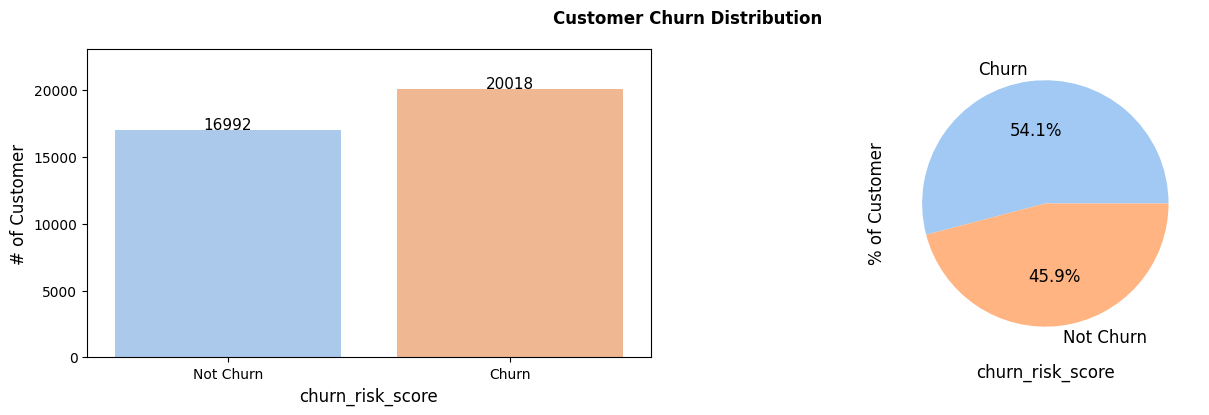

In [ ]:
# Membuat visualisasi Distribusi churn_risk_score
fig, ax =plt.subplots(1,2,figsize=(16,4))

sns.countplot(x='churn_risk_score', data=df_eda,palette = sns.color_palette('pastel')[0:10], ax=ax[0])
ax[0].set_xlabel("churn_risk_score", fontsize= 12)
ax[0].set_ylabel("# of Customer", fontsize= 12)
fig.suptitle('Customer Churn Distribution', fontsize=12, fontweight='bold')
ax[0].set_ylim(0,23000)
plt.xlabel("churn_risk_score", fontsize= 12)
plt.ylabel("# of Customer", fontsize= 12)
ax[0].set_xticks([0,1], ['Not Churn', 'Churn'])
for p in ax[0].patches:
    ax[0].annotate("%.0f"%(p.get_height()), (p.get_x() + p.get_width() / 2,
                    p.get_height()+405), ha='center', va='center',fontsize = 11)

df_eda['churn_risk_score'].value_counts().plot(kind='pie', labels = ['Churn', 'Not Churn'],autopct='%1.1f%%', textprops = {"fontsize":12}, colors = sns.color_palette('pastel')[0:10])
ax[1].set_ylabel("% of Customer", fontsize= 12)
plt.show()

Observasi:
- Berdasarkan data tersebut, dataset memiliki persentase customer yang akan churn (1) lebih banyak 8.2% dibandingkan dengan yang tidak churn (0), dengan masing-masing nilai persentase sebesar 54.1% dan 45.9%

### 4-5 Visualisasi EDA Feature Numerik

#### Feature Numerik terhadap Churn

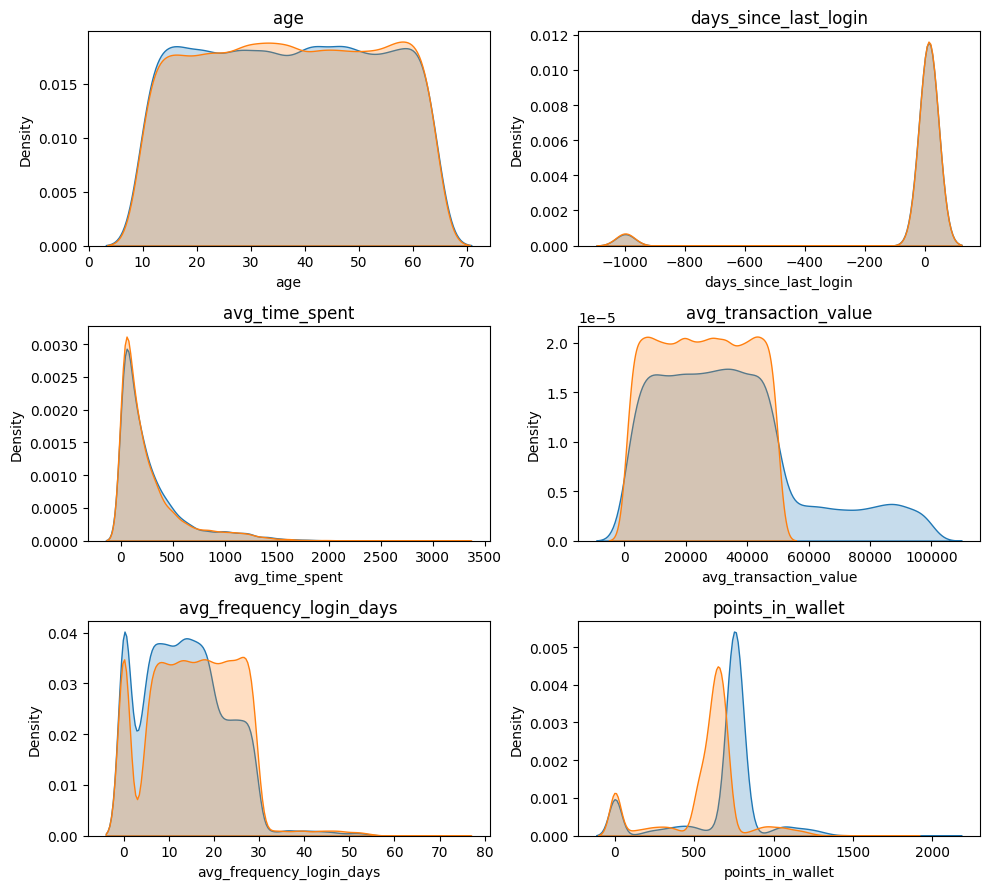

In [ ]:
#definisikan eda_num untuk feature numerik
eda_num= ['age',
 'days_since_last_login',
 'avg_time_spent',
 'avg_transaction_value',
 'avg_frequency_login_days',
 'points_in_wallet']

#Membuat feature numerik terhadap churn
k = len(eda_num)
n = 2
m = (k - 1) // n +1
fig, axes = plt.subplots(m, n, figsize=(n * 5, m * 3))
for i, (name, col) in enumerate(df[eda_num].items()):
    r, c = i // n, i % n
    ax = axes[r, c]
    sns.kdeplot(df_eda.loc[(df_eda['churn_risk_score'] == 0), name], label = 'Not Churn', fill = True, ax=ax, warn_singular=False)
    sns.kdeplot(df_eda.loc[(df_eda['churn_risk_score'] == 1), name], label = 'Churn', fill = True, ax=ax, warn_singular=False)
    ax.set_title(name)
fig.tight_layout()

Observasi:
- Pada usia dibawah 20 tahun -30 tahun banyak yang melakukan churn
- customer akan churn jika hanya membuka website perushaan selama < 500 menit
- Banyak customer yang melakukan churn jika customer tersebut melakukan transaksi rata-rata < 60000
- banyak customer yang akan churn jika rata-rata frekuensi login > 20 hari
- customer banyak yang churn ketika points_in_walletnya < 750

### 4-6 Visualisasi EDA Feature Kategorikal

In [ ]:
#definisikan data visualisasi
def visualize(c):
    plt.rcParams['figure.figsize'] = [20, 4]
    x=[0.02 for i in range(len(list(df_eda[c].unique())))]

    plt.subplot(1, 3, 1)
    plt.title(f'{c} terhadap %churn', fontsize=12)
    ax = sns.countplot(data = df_eda, x = c, hue="churn_risk_score", palette = sns.color_palette('pastel')[0:10])
    plt.xlabel(f'{c}', fontsize= 12)
    plt.ylabel("#churn", fontsize= 12)
    plt.xticks(rotation=90)
    plt.legend(loc='center')
    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.1, p.get_height()-0.4))


    plt.subplot(1, 3, 2)
    round(df_eda[c].value_counts()/df_eda.shape[0]*500,2).plot.pie(autopct= '%1.1f%%',colors=sns.color_palette('pastel')[0:10],shadow=True)
    plt.ylabel("")
    plt.title(c, fontsize=12)


    plt.subplot(1,3,3)
    plt.title(f'{c} terhadap %churn', fontsize=12)
    ax = sns.barplot(x = c, y = "churn_risk_score", data = df_eda, palette = sns.color_palette('pastel')[1:2], errorbar= None)
    plt.ylabel("%churn", fontsize= 12)
    plt.xlabel(f'{c}', fontsize= 12)
    #plt.ylim(0,1)
    plt.xticks(rotation=90)
    for p in ax.patches:
        ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.3, p.get_height()+0.005),fontsize=9)


    plt.show()

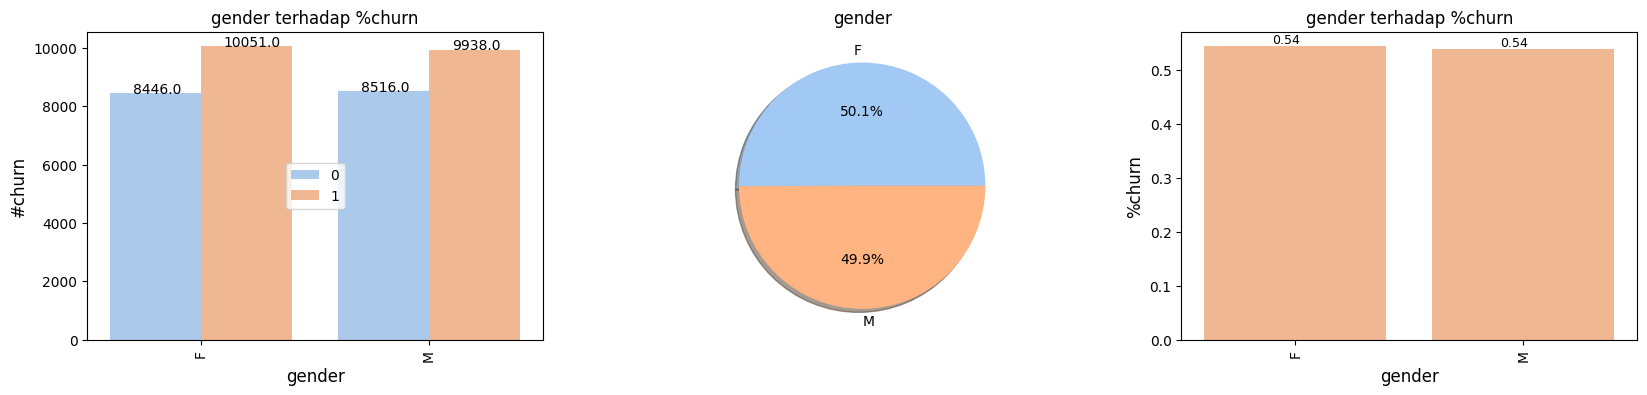

In [ ]:
visualize('gender')

Observasi:
- perempuan memiliki Kemungkinan untuk churn lebih tinggi, meskipun demikian baik laki-laki maupun perempuan memiliki kemungkinan churn yang relatif sama.

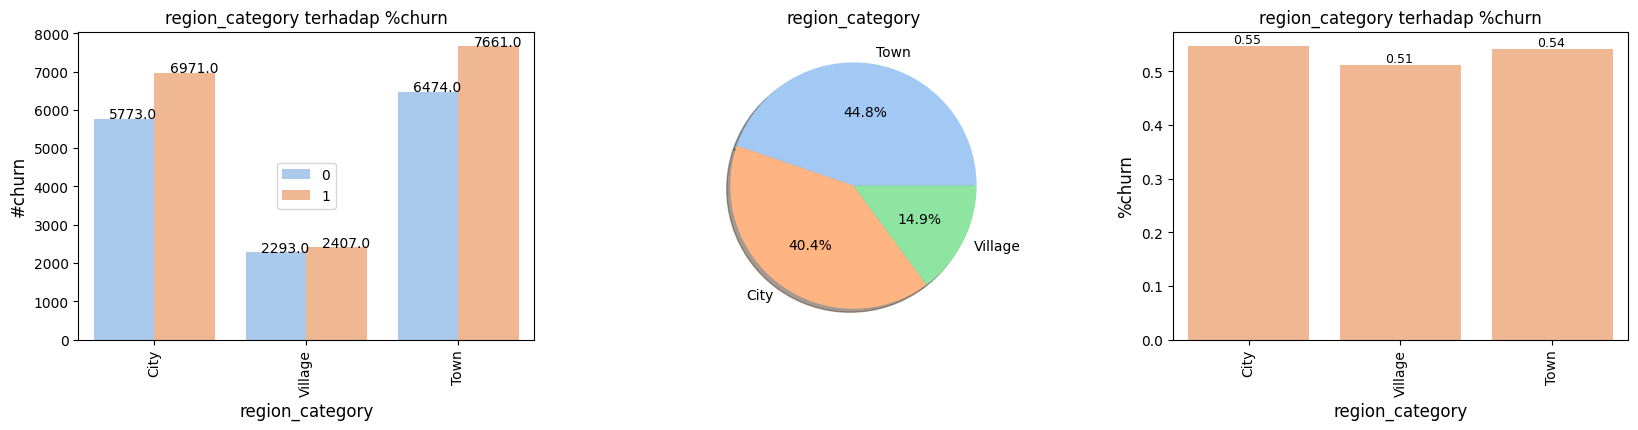

In [ ]:
visualize('region_category')

Observasi:
- customer yang tinggal di city lebih mungkin melakukan churn, yand diikuti oleh town

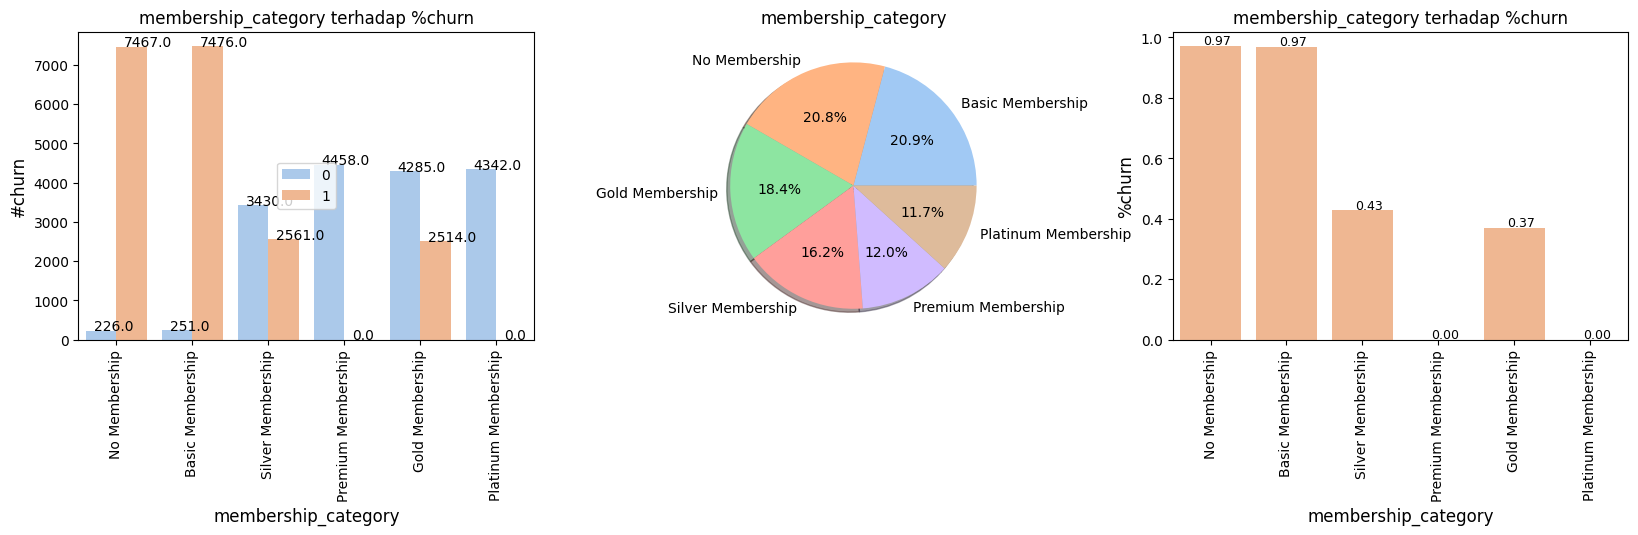

In [ ]:
visualize('membership_category')

Observasi:
- orang-orang yang tidak mempunyai membership lebih mungkin melakukan churn.

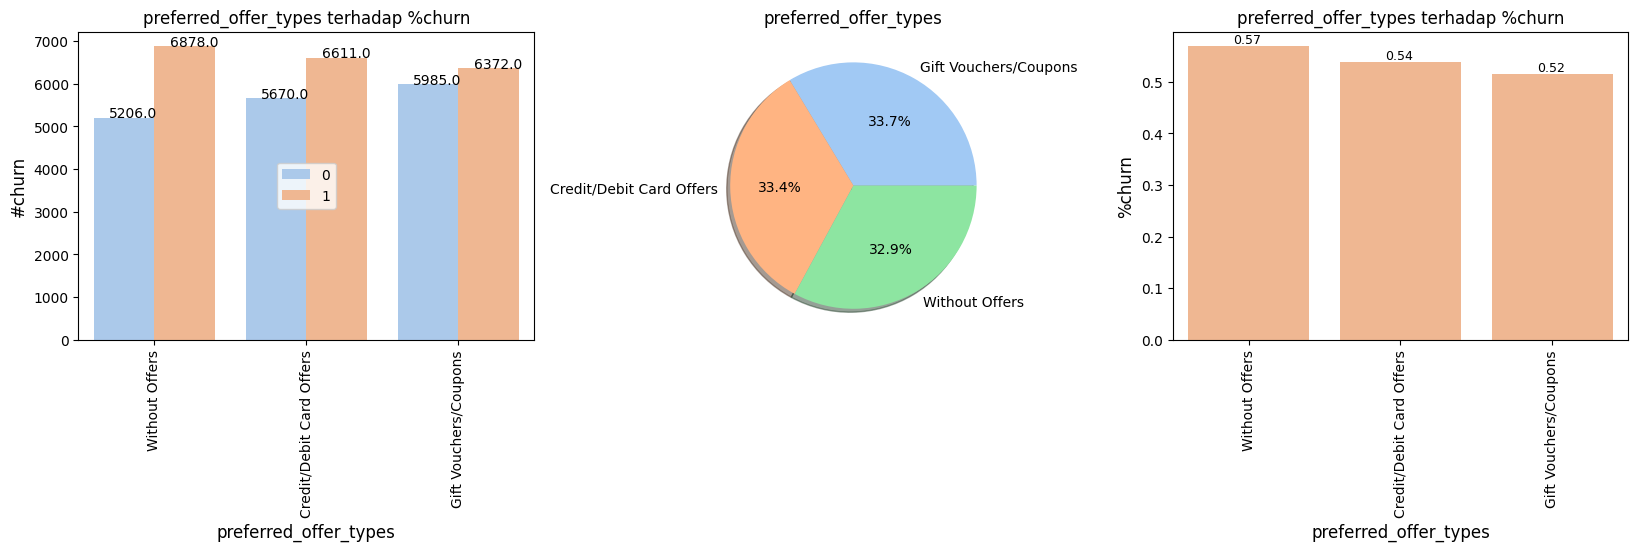

In [ ]:
visualize('preferred_offer_types')

Customer yang tidak diberikan penawaran dari perusahaan lebih mungkin melakukan churn.

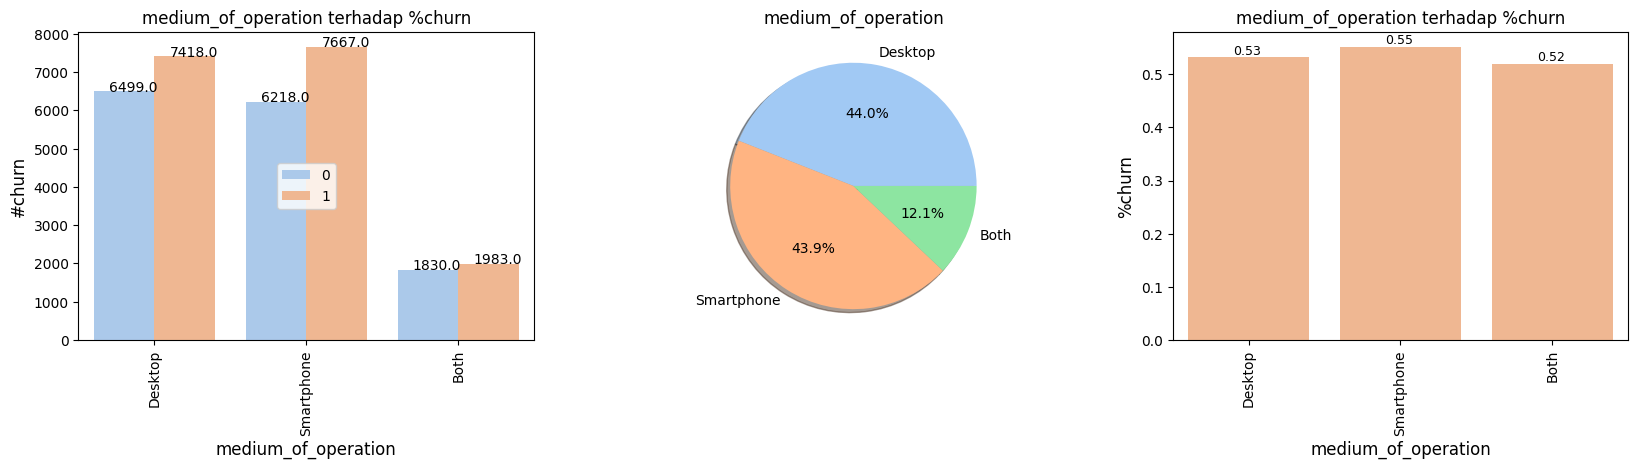

In [ ]:
visualize('medium_of_operation')

Orang-orang yang mengakses perusahaan/pembelian dengan smartphone lebih cenderung melakukan churn

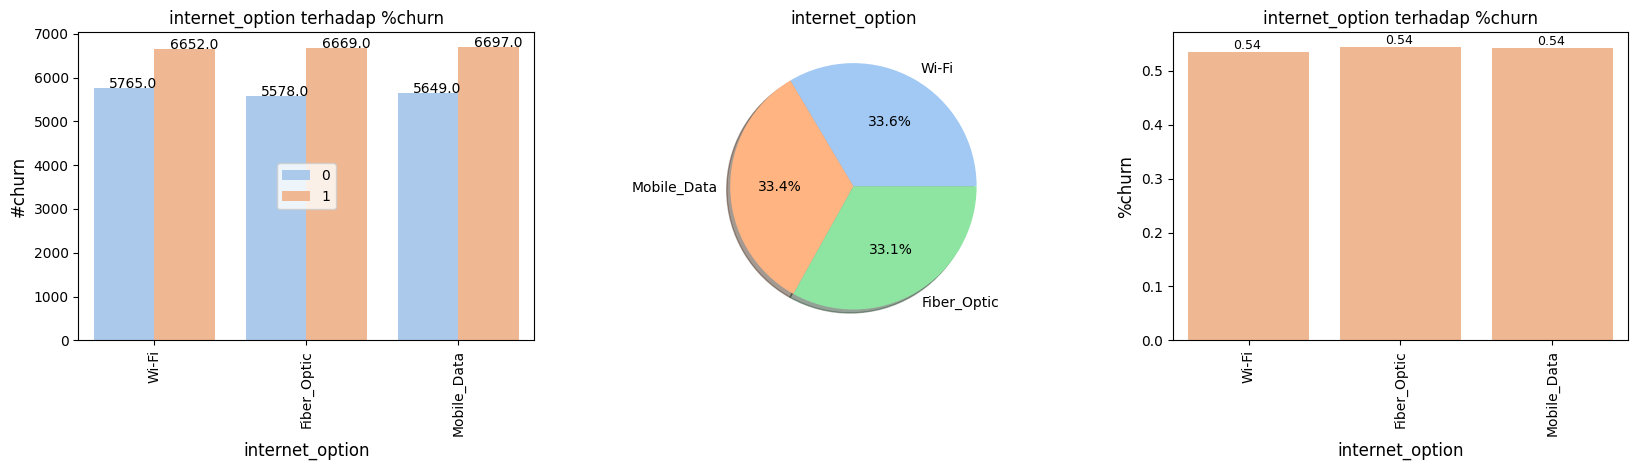

In [ ]:
visualize('internet_option')

Semua jenis internet_option memiliki kemungkinan yang sama untuk churn dari perusahaan.

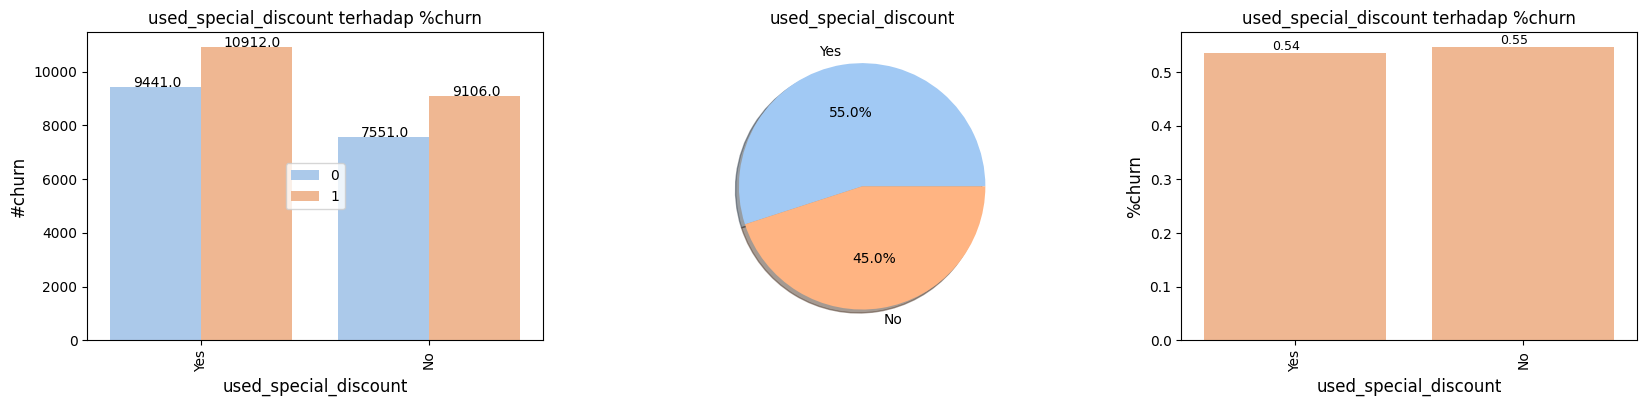

In [ ]:
visualize('used_special_discount')

Customer yang menggunakan special discount dengan yang tidak, sama-sama meiliki kemungkinan untuk churn.

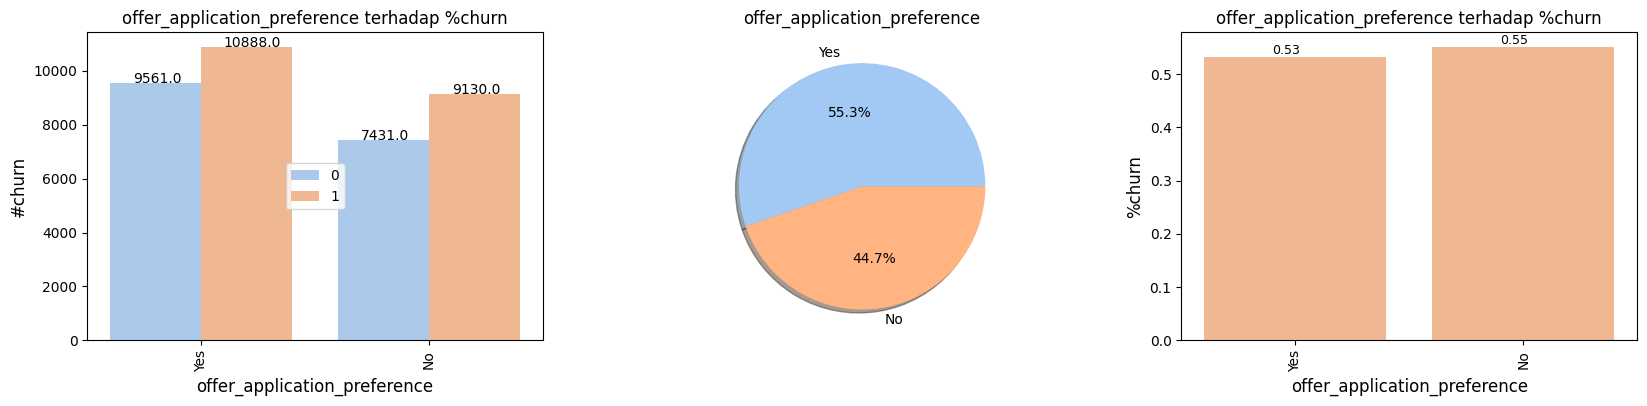

In [ ]:
visualize('offer_application_preference')

Customer yang ditawarkan aplikasi lebih mereka sukai sama-sama memiliki kemungkinan untuk churn.

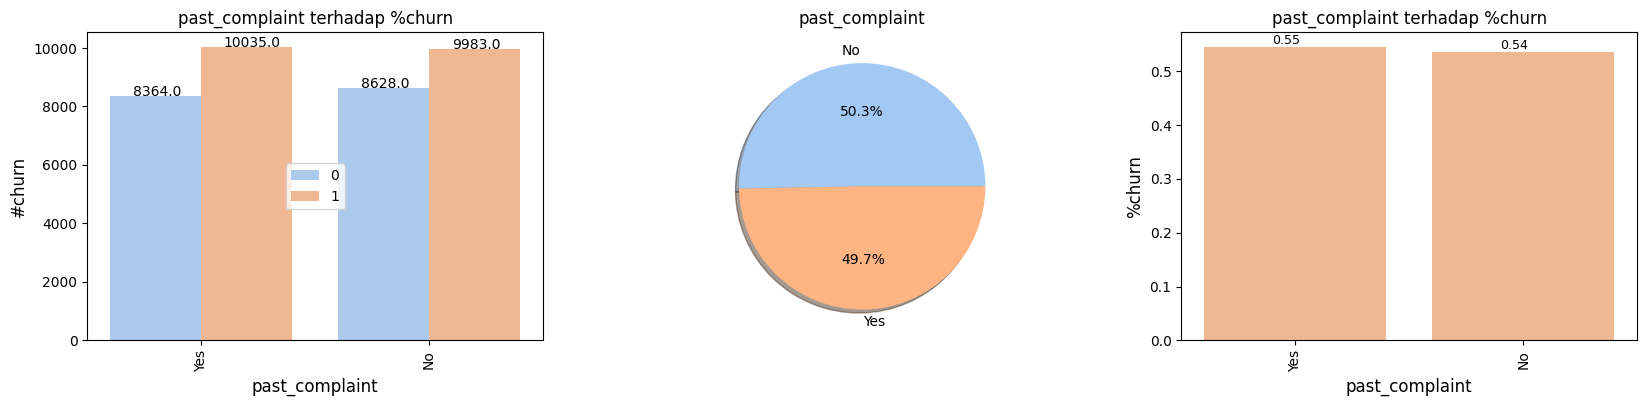

In [ ]:
visualize('past_complaint')

Customer yang memiliki histori komplain dan yang tidak, sama-sama memiliki kemungkinan untuk churn

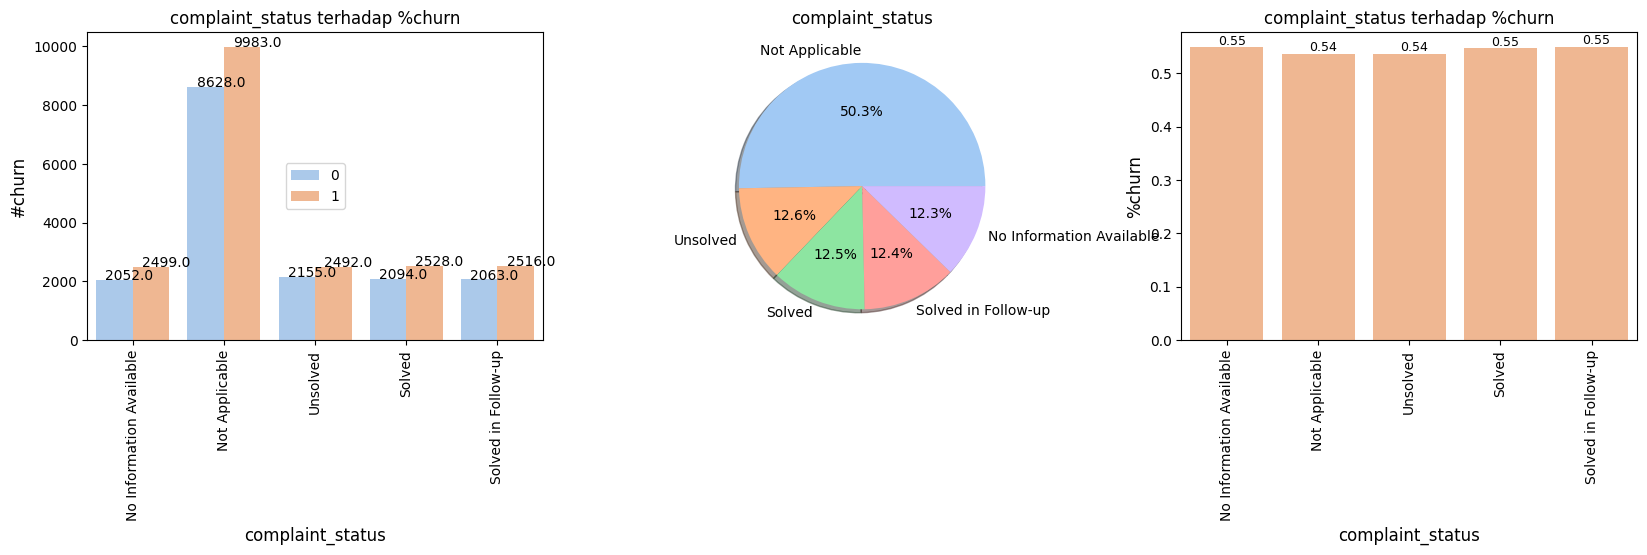

In [ ]:
visualize('complaint_status')

Semua jenis komplain status baik yang sudah diselesaikan maupun belum, sama-sama memiliki kemungkinan untuk churn.

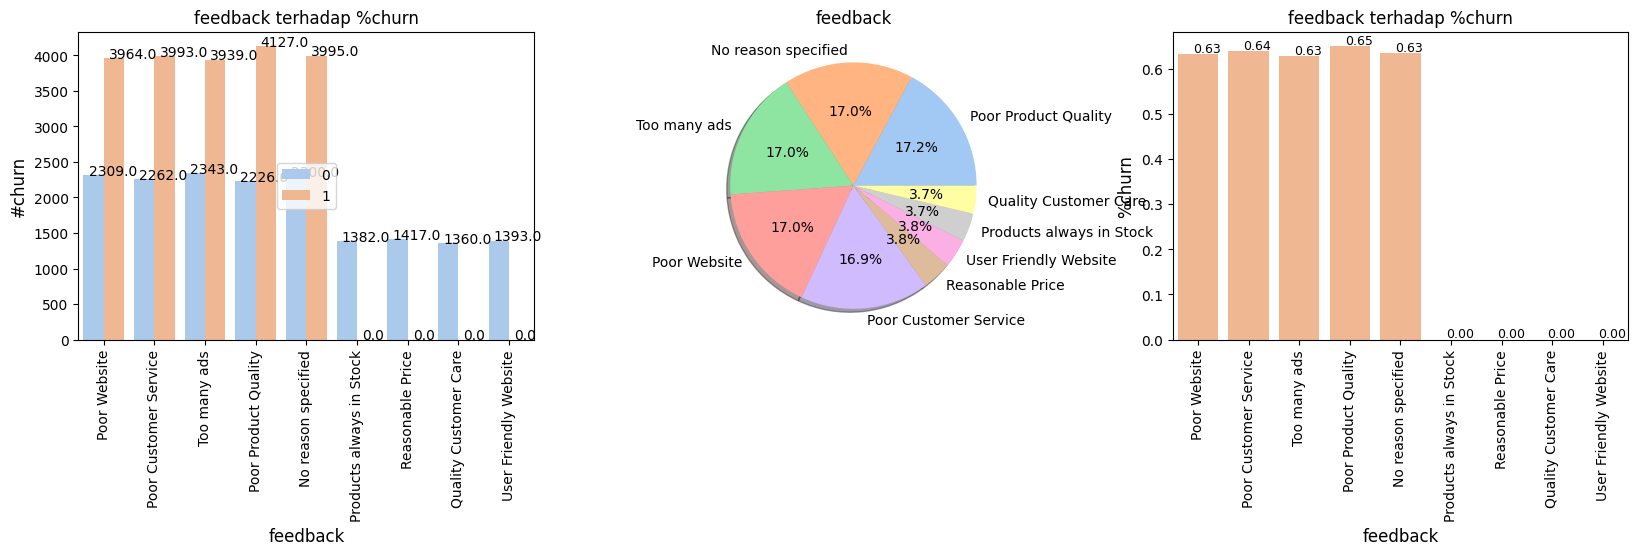

In [ ]:
visualize('feedback')

Kemungkinan terbesar customer akan churn adalah ketika website, customer service dan iklan yang terlalu banyak pada website perusahaan tersebut.

### 4-7 Korelasi


In [ ]:
#tampilkan data korelasi numerik
df.corr()

<ipython-input-181-0e7bfb4fb728>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,churn_risk_score
age,1.000000,-0.003922,0.000746,-0.000333,-0.001738,-0.001002,0.006233
days_since_last_login,-0.003922,1.000000,0.000058,0.004043,-0.000678,-0.000014,-0.006015
avg_time_spent,0.000746,0.000058,1.000000,0.023113,-0.001355,-0.001239,-0.013396
avg_transaction_value,-0.000333,0.004043,0.023113,1.000000,-0.116690,0.056447,-0.217906
avg_frequency_login_days,-0.001738,-0.000678,-0.001355,-0.116690,1.000000,-0.025818,0.113436
points_in_wallet,-0.001002,-0.000014,-0.001239,0.056447,-0.025818,1.000000,-0.200284
churn_risk_score,0.006233,-0.006015,-0.013396,-0.217906,0.113436,-0.200284,1.000000


Observasi:
- Korelasi tertinggi terhadap churn_risk_score adalah avg_frequency_login_days dan age. Sementara fitur lainnya memiliki korelasi yang sangat lemah dan negatif terhadap churn_rate_score

## 5 - Feature Engineering

Sebelum masuk pada proses spliting data, perlu dilakukan drop data terduplikasi terlebih dahulu untuk menghindari bias yang tidak diinginkan ([A Practical Guide to Data Cleaning](https://deepchecks.com/what-is-data-cleaning/#:~:text=Stages%20of%20Data%20Cleaning,-Stage%201%3A%20Removing&text=Duplicate%20entries%20can%20ruin%20the,disappointing%20the%20model%20in%20production.))

In [ ]:
#drop data terduplikasi
df=df.drop_duplicates(keep=False)

Selanjutnya dilakukan feature engineering untuk membuat pemodelan. Namun sebelumnya, dibuat variabel baru RS agar pemanggilan random_state lebih mudah.

In [ ]:
#buat variabel random state
RS=100

### 5-1 Split X (Features) dan y(Target)

Data dilakukan split antara features dan target agar tidak terjadi kebocoran data. Data y (target) adalah `churn_risk_score` dan X adalah keseluruhan feature (kecuali data target)

In [ ]:
#split data menjadi X, y
X= df.drop(['churn_risk_score'], axis=1)
y=df['churn_risk_score']

In [ ]:
#tampilkan data X
X.head()

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback
0,9f420209e7d129f3,29,F,NaN,No Membership,2017-04-05,Yes,Without Offers,NaN,Wi-Fi,1900-01-01 22:29:49,4,1184.49,38604.69,10.0,627.48,Yes,Yes,Yes,No Information Available,Poor Website
1,ac6e97806267549e,50,M,NaN,Basic Membership,2017-03-31,Yes,Without Offers,Desktop,Fiber_Optic,1900-01-01 15:44:56,11,338.15,7665.66,17.0,575.97,Yes,No,Yes,No Information Available,Poor Customer Service
2,a6aa19b1580eed4e,26,F,City,Silver Membership,2017-02-11,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,1900-01-01 20:31:53,8,235.14,37671.69,5.0,767.93,Yes,No,Yes,No Information Available,Too many ads
3,aeee343277211c2f,63,F,Village,No Membership,2015-12-23,No,Credit/Debit Card Offers,Desktop,Fiber_Optic,1900-01-01 14:28:05,10,56.67,15678.14,11.0,590.22,No,Yes,No,Not Applicable,Too many ads
4,82448b5c8ce6390c,64,M,Town,Silver Membership,2015-03-20,NaN,Gift Vouchers/Coupons,Smartphone,Wi-Fi,1900-01-01 04:16:48,9,153.99,8422.68,0.0,722.04,Yes,No,No,Not Applicable,Poor Product Quality


In [ ]:
#tampilkan data y
y

0        1
1        1
2        0
3        1
4        0
        ..
37005    0
37006    0
37007    0
37008    0
37009    1
Name: churn_risk_score, Length: 36974, dtype: int64

### 5-2 Feature Extraction pada Tipe Data Waktu

Tipe data waktu/tanggal harus diekstrak terlebih dahulu sebelum dilakukan modelling. Hal ini karena data waktu harus diubah menjadi data numerik agar data dapat dilakukan training (https://dev.to/mage_ai/guide-to-model-training-part-4-ditching-datetime-2eg6)

In [ ]:
#ekstrak fitur tahun, bulan, hari dan jam pada df
def ekstrak_fitur(df):
  df['year_joining_date'] = df['joining_date'].dt.year
  df['month_joining_date'] = df['joining_date'].dt.month
  df['date_joining_date'] = df['joining_date'].dt.dayofweek
  df['hour_last_visit_time'] = df['last_visit_time'].dt.hour

In [ ]:
#ekstrak fitur pada X
ekstrak_fitur(X)

In [ ]:
#tampilkan data X
X.head(5)

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,year_joining_date,month_joining_date,date_joining_date,hour_last_visit_time
0,9f420209e7d129f3,29,F,NaN,No Membership,2017-04-05,Yes,Without Offers,NaN,Wi-Fi,1900-01-01 22:29:49,4,1184.49,38604.69,10.0,627.48,Yes,Yes,Yes,No Information Available,Poor Website,2017,4,2,22
1,ac6e97806267549e,50,M,NaN,Basic Membership,2017-03-31,Yes,Without Offers,Desktop,Fiber_Optic,1900-01-01 15:44:56,11,338.15,7665.66,17.0,575.97,Yes,No,Yes,No Information Available,Poor Customer Service,2017,3,4,15
2,a6aa19b1580eed4e,26,F,City,Silver Membership,2017-02-11,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,1900-01-01 20:31:53,8,235.14,37671.69,5.0,767.93,Yes,No,Yes,No Information Available,Too many ads,2017,2,5,20
3,aeee343277211c2f,63,F,Village,No Membership,2015-12-23,No,Credit/Debit Card Offers,Desktop,Fiber_Optic,1900-01-01 14:28:05,10,56.67,15678.14,11.0,590.22,No,Yes,No,Not Applicable,Too many ads,2015,12,2,14
4,82448b5c8ce6390c,64,M,Town,Silver Membership,2015-03-20,NaN,Gift Vouchers/Coupons,Smartphone,Wi-Fi,1900-01-01 04:16:48,9,153.99,8422.68,0.0,722.04,Yes,No,No,Not Applicable,Poor Product Quality,2015,3,4,4


In [ ]:
#tampilkan jumlah baris dan kolom dari X
print(X.shape)

(36974, 25)


Setelah variabel X diekstrak, jumlah kolom memjadi 25 karena ada penambahan kolom `year_joining_date`,`month_joining_date`,	`date_joining_date`, dan `hour_last_visit_time`

### 5-3 Split antara Train-set, Val-set dan Test-set

Selanjutnya lakukan split train-set, val-set dan test-set dengan persentase
- train_val: 85%
- test-set: 15%.

Train_val set akan displit lagi menjadi:
- train-set: 85%
- test-set: 15%.

In [ ]:
# Split antara Train-Set, Val-Set, dan Test-Set

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, random_state=RS)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.15, random_state=RS)

print('Train Size : ', X_train.shape)
print('Val Size : ', X_val.shape)
print('Test Size : ', X_test.shape)

Train Size :  (26712, 25)
Val Size :  (4715, 25)
Test Size :  (5547, 25)


In [ ]:
#tampilkan hasil split
X_train.head()

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,year_joining_date,month_joining_date,date_joining_date,hour_last_visit_time
17264,9dac5cf940fd7562,60,F,Town,Silver Membership,2016-08-17,Yes,Gift Vouchers/Coupons,Desktop,Fiber_Optic,1900-01-01 20:27:40,20,219.33,19934.00,12.0,236.128364,Yes,Yes,No,Not Applicable,Too many ads,2016,8,2,20
31358,afc93156ac7511d4,60,M,City,No Membership,2017-06-30,No,Gift Vouchers/Coupons,Desktop,Fiber_Optic,1900-01-01 10:40:37,11,127.84,3678.49,21.0,661.430000,No,Yes,No,Not Applicable,Poor Website,2017,6,4,10
1772,82c297d74eb8a89b,13,M,Town,Basic Membership,2017-06-11,Yes,Gift Vouchers/Coupons,NaN,Mobile_Data,1900-01-01 00:12:56,12,227.68,41350.38,21.0,923.715969,No,Yes,No,Not Applicable,No reason specified,2017,6,6,0
36441,849003747d1cbfb0,22,F,Town,Silver Membership,2016-02-09,No,Without Offers,Desktop,Mobile_Data,1900-01-01 09:28:09,5,162.91,28574.46,18.0,620.450000,No,Yes,No,Not Applicable,Too many ads,2016,2,1,9
4110,9bdeca18e5003296,50,M,City,Basic Membership,2017-03-08,No,Without Offers,Smartphone,Wi-Fi,1900-01-01 22:28:50,14,342.58,7069.45,23.0,523.320000,Yes,No,Yes,Unsolved,Too many ads,2017,3,2,22


In [ ]:
#tampilkan hasil split
X_val.head()

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,year_joining_date,month_joining_date,date_joining_date,hour_last_visit_time
34592,83bf9873a841b9af,57,F,Town,Platinum Membership,2015-04-01,Yes,Gift Vouchers/Coupons,Desktop,Wi-Fi,1900-01-01 22:25:07,10,113.78,41352.50,11.0,740.850000,No,Yes,Yes,Unsolved,Poor Customer Service,2015,4,2,22
18259,80f69ce8557f6cf2,32,M,NaN,Silver Membership,2017-06-07,Yes,Credit/Debit Card Offers,Both,Wi-Fi,1900-01-01 05:36:03,12,659.23,47736.00,5.0,654.550000,Yes,Yes,No,Not Applicable,Poor Customer Service,2017,6,2,5
28816,ba1ac6bedbacca23,30,F,Town,Basic Membership,2016-04-16,NaN,Without Offers,Desktop,Mobile_Data,1900-01-01 22:09:00,9,32.75,35860.91,13.0,330.256619,No,Yes,No,Not Applicable,Poor Customer Service,2016,4,5,22
32758,897fa6b9c72edf98,63,M,Town,Basic Membership,2017-02-08,No,Without Offers,Desktop,Wi-Fi,1900-01-01 15:44:00,12,32.64,8702.11,28.0,1002.577487,No,Yes,No,Not Applicable,Poor Customer Service,2017,2,2,15
9594,80430eab0d5413f8,23,M,City,Basic Membership,2016-02-29,No,Without Offers,Desktop,Wi-Fi,1900-01-01 04:34:02,13,171.56,26230.50,21.0,539.340000,No,Yes,Yes,No Information Available,No reason specified,2016,2,0,4


In [ ]:
#tampilkan hasil split
X_test.head()

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,year_joining_date,month_joining_date,date_joining_date,hour_last_visit_time
6967,a721ee6d726d9b22,32,F,NaN,Silver Membership,2016-06-09,No,Gift Vouchers/Coupons,Desktop,Wi-Fi,1900-01-01 12:07:04,14,33.44,35039.04,21.0,765.66,Yes,No,No,Not Applicable,No reason specified,2016,6,3,12
32668,816d52b16b1f8874,19,M,Town,Silver Membership,2017-08-23,NaN,Gift Vouchers/Coupons,NaN,Wi-Fi,1900-01-01 06:40:39,18,44.65,28727.83,25.0,619.81,No,Yes,No,Not Applicable,Poor Customer Service,2017,8,2,6
25370,b78fbcecfffa42a7,31,F,City,No Membership,2016-02-28,Yes,Gift Vouchers/Coupons,Desktop,Fiber_Optic,1900-01-01 04:37:26,10,31.71,40394.02,6.0,658.24,Yes,No,Yes,No Information Available,Poor Customer Service,2016,2,6,4
10326,ac10c405831bb247,15,F,City,Gold Membership,2016-02-25,Yes,Without Offers,NaN,Mobile_Data,1900-01-01 20:07:12,5,521.01,17082.49,26.0,777.30,No,Yes,No,Not Applicable,No reason specified,2016,2,3,20
4195,afce57f574b5cdf4,47,F,NaN,Silver Membership,2015-05-11,No,Without Offers,Smartphone,Fiber_Optic,1900-01-01 12:28:11,14,30.96,46366.48,9.0,787.04,No,Yes,Yes,No Information Available,No reason specified,2015,5,0,12


### 5-4 Handling Outlier


#### Outlier X_train

Selanjutnya, melakukan handling outlier pada kolom numerik X_train terlebih dahulu.

In [ ]:
#fungsi untuk menampilkan outlier pada masing-masing variabel yang ditentukan.
def diagnostic_plots(df, variable):
    # Mendefinisikan figure size
    plt.figure(figsize=(20, 3))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram '+ variable )

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot ' + variable)

    plt.show()

In [ ]:
#variabel yang ingin dicek outliernya
check_outlier_columns= ['age', 'days_since_last_login', 'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days','points_in_wallet']

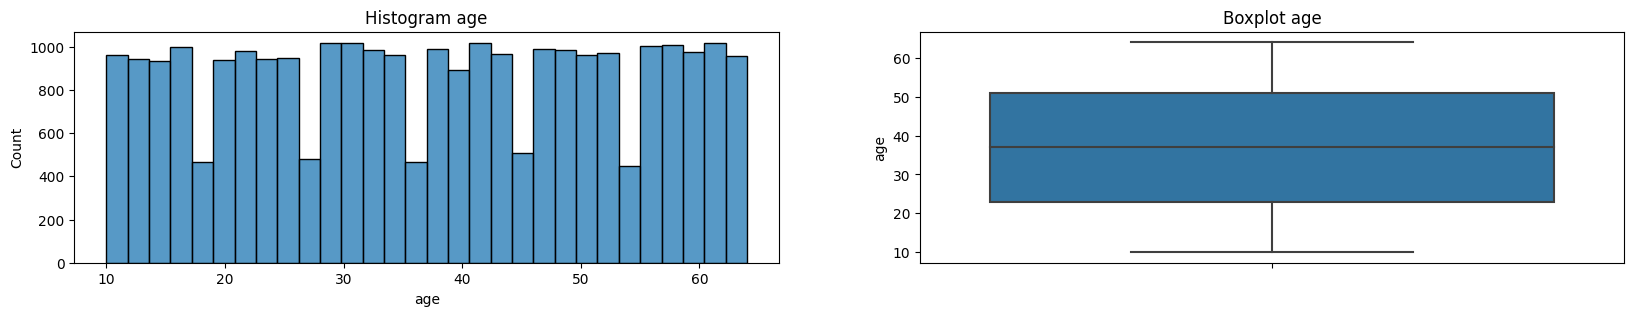

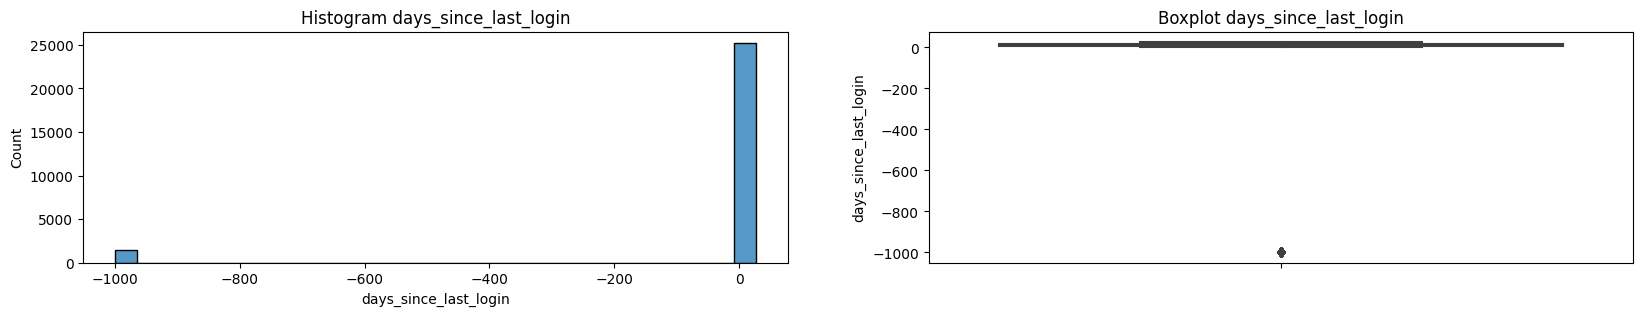

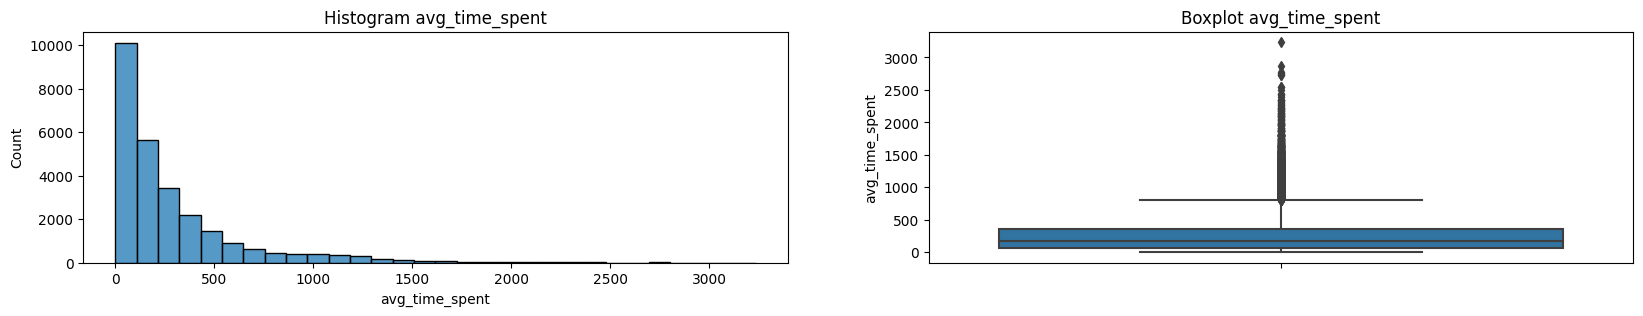

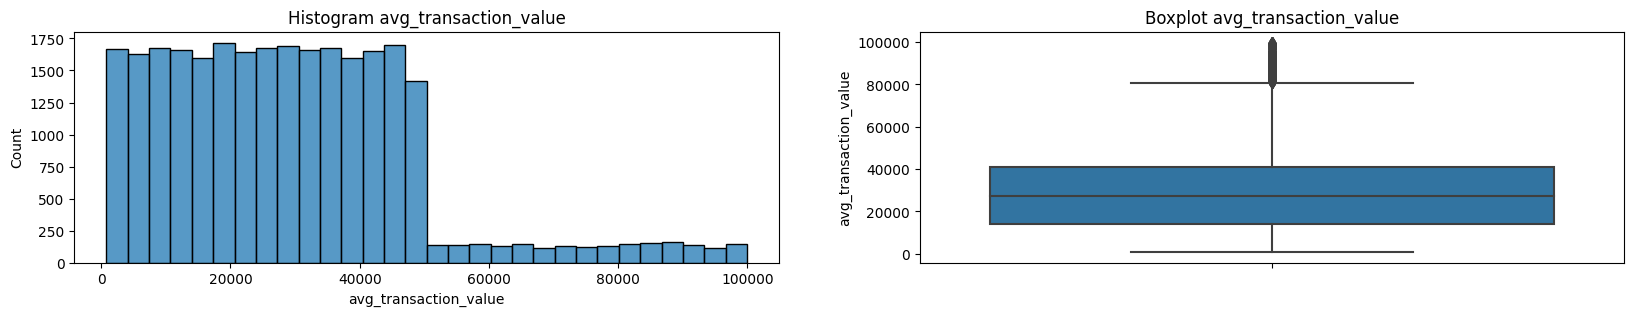

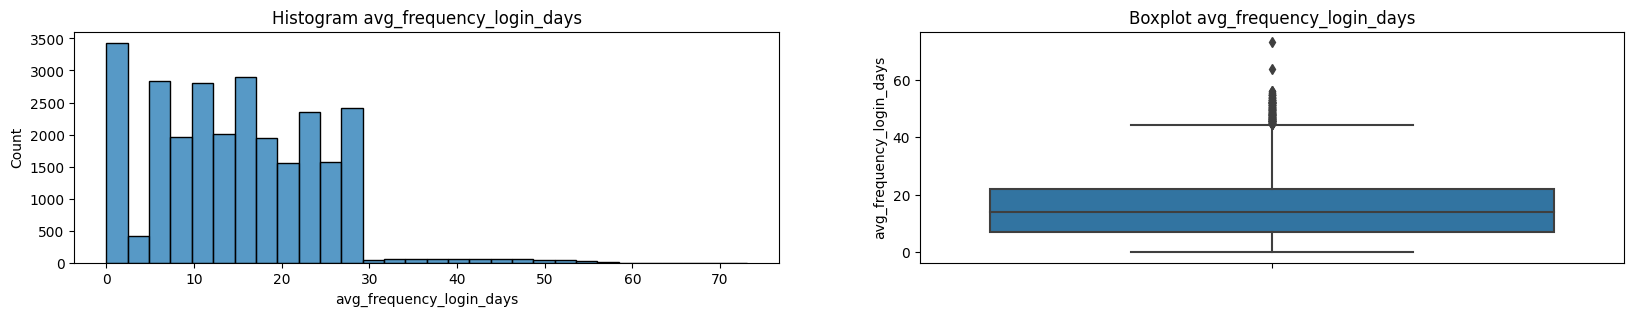

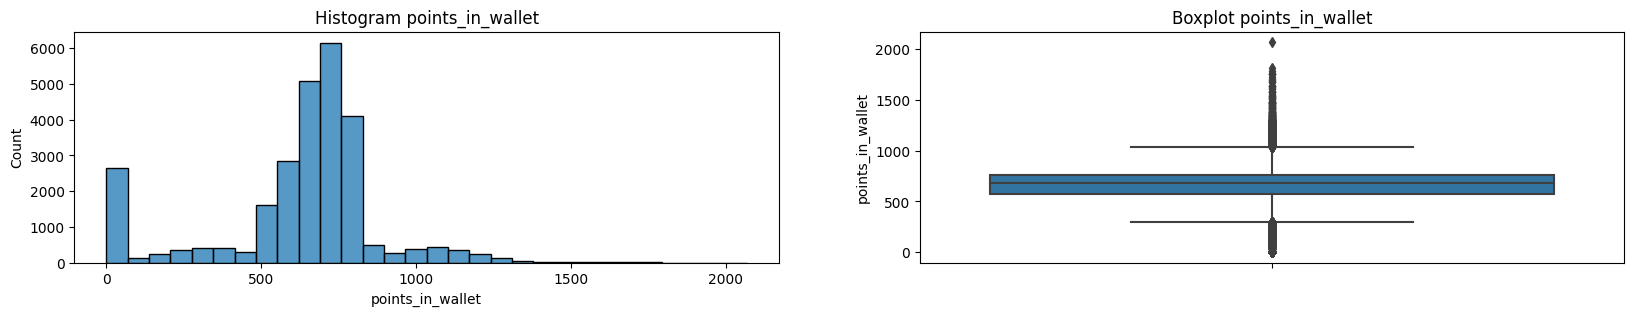

In [ ]:
#tampilkan distribusi dari masing-masing numerik-outlier
for i in check_outlier_columns :
    diagnostic_plots(X_train, i)

In [ ]:
# Fungsi Pengecekan Outlier
def outliers_check(df,variable):
    #Cek skew feature
    global interq
    global lower_boundary
    global upper_boundary
    skew = df[variable].skew()
    if (df[variable].skew() > 0.5 and df[variable].skew() <= 1) or (df[variable].skew() < -0.5 and df[variable].skew() >= -1):
        interq = df[variable].quantile(0.75) - df[variable].quantile(0.25)
        lower_boundary = df[variable].quantile(0.25) - (interq * 1.5)
        upper_boundary = df[variable].quantile(0.75) + (interq * 1.5)
        outlier = df[(df[variable]< lower_boundary) | (df[variable]>upper_boundary)]
    elif df[variable].skew() >= 1 or df[variable].skew() <= -1:
        interq = df[variable].quantile(0.75) - df[variable].quantile(0.25)
        lower_boundary = df[variable].quantile(0.25) - (interq * 3)
        upper_boundary = df[variable].quantile(0.75) + (interq * 3)
        outlier = df[(df[variable]<lower_boundary) | (df[variable]>upper_boundary)]
    else:
        lower_boundary = df[variable].mean() - (3 * df[variable].std())
        upper_boundary = df[variable].mean() + (3 * df[variable].std())
        outlier = df[(df[variable]<lower_boundary) | (df[variable]>upper_boundary)]

    return outlier, lower_boundary, upper_boundary, skew

In [ ]:
#tampilkan informasi data oulier
for i in check_outlier_columns:
    print(i)
    print('Jumlah Outlier:' ,round((len(outliers_check(X_train, i)[0])),2))
    print('Persentase Outlier:' ,round((len(outliers_check(X_train, i)[0])/len(X_train)*100),2))
    print('Skew:' ,round((outliers_check(X_train, i)[3]),2))
    print('Lower Boundary:' ,round((outliers_check(X_train, i)[1]),2))
    print('Upper Boundary:' ,round((outliers_check(X_train, i)[2]),2))
    print('---')

age
Jumlah Outlier: 0
Persentase Outlier: 0.0
Skew: -0.01
Lower Boundary: -10.41
Upper Boundary: 84.72
---
days_since_last_login
Jumlah Outlier: 1447
Persentase Outlier: 5.42
Skew: -3.94
Lower Boundary: -16.0
Upper Boundary: 40.0
---
avg_time_spent
Jumlah Outlier: 612
Persentase Outlier: 2.29
Skew: 2.27
Lower Boundary: -834.11
Upper Boundary: 1254.46
---
avg_transaction_value
Jumlah Outlier: 0
Persentase Outlier: 0.0
Skew: 1.02
Lower Boundary: -65728.36
Upper Boundary: 120577.1
---
avg_frequency_login_days
Jumlah Outlier: 226
Persentase Outlier: 0.85
Skew: 0.38
Lower Boundary: -13.7
Upper Boundary: 43.01
---
points_in_wallet
Jumlah Outlier: 4802
Persentase Outlier: 17.98
Skew: -0.77
Lower Boundary: 297.35
Upper Boundary: 1032.94
---


Berdasarkan gambar dan pengecekan outlier, `age` dan `avg_transaction_value` tidak memiliki outlier, sehingga tidak perlu dilakukan handling. Sementara untuk feature lainnya, masing-masing feature memiliki skewed yang berbeda-beda. Sehingga, akan dihandling terpisah.

##### ***Handling outlier days_since_last_join***

pada `days_since_last_join`, feature ini terdistribusi tidak normal dan ekstrem skewed ke kiri (-3.98).

In [ ]:
#cek statistik deskriptif feature

outlier_last_login = outliers_check(X_train,'days_since_last_login')[0]
outlier_last_login.describe()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,year_joining_date,month_joining_date,date_joining_date,hour_last_visit_time
count,1447.000000,1447.0,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000
mean,37.139599,-999.0,278.063685,29000.960283,14.613715,624.108675,2016.016586,6.567381,2.946095,11.692467
std,15.916227,0.0,326.621621,19624.940770,9.486249,263.528559,0.833099,3.403194,2.020263,7.007906
min,10.000000,-999.0,0.000000,840.340000,0.000000,0.000000,2015.000000,1.000000,0.000000,0.000000
25%,23.000000,-999.0,62.750000,13581.935000,7.000000,563.235000,2015.000000,4.000000,1.000000,6.000000
50%,38.000000,-999.0,161.250000,27241.000000,14.000000,671.720000,2016.000000,7.000000,3.000000,12.000000
75%,51.000000,-999.0,353.030000,40704.250000,22.000000,755.650000,2017.000000,9.000000,5.000000,18.000000
max,64.000000,-999.0,2341.451934,99696.230000,73.061995,1755.094693,2017.000000,12.000000,6.000000,23.000000


`days_since_last_login` bernilai negatif(-999) dan karena hari tidak bisa bernilai negatif, maka outlier tersebut akan di-drop.

In [ ]:
#buat index outlier yang akan didrop, drop pada X_train dan y_train
drop_last_login = outlier_last_login.index.to_list()

In [ ]:
#buat variable baru terlebih dahulu
X_train_clean= X_train.copy()
#buat index outlier yang akan didrop, drop pada X_train dan y_train
X_train_clean.drop(axis=0, index=drop_last_login,inplace=True)
y_train.drop(axis=0, index=drop_last_login,inplace=True)

In [ ]:
#tampilkan jumlah kolom dan baris
print(X_train_clean.shape)
print(y_train.shape)

(25265, 25)
(25265,)


##### ***Handling Outlier pada `avg_time_spent`***

Pada feature ini, terdapat 2.41% outlier dengan skewed ke arah ekstrim positif. Berdasarkan korelasi fitur pada EDA, besar korelasi antara `avg_time_spend`bernilai negatif (-0.013396) yang berarti keterkaitannya tidak signifikan. Serta persentase outlier cukup rendah, sehingga sebaiknya outlier tersebut di-drop.

In [ ]:
# Check statistik deskriptif untuk outlier

outlier_time_spent = outliers_check(X_train_clean,'avg_time_spent')[0]
outlier_time_spent.describe()


,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,year_joining_date,month_joining_date,date_joining_date,hour_last_visit_time
count,572.000000,572.000000,572.000000,572.00000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000
mean,36.248252,11.305944,1554.161334,30152.41743,14.760436,610.739072,2015.977273,6.589161,3.034965,12.260490
std,15.813645,5.371237,302.536098,19665.53910,9.629124,278.242822,0.839799,3.472295,2.010176,6.687703
min,10.000000,1.000000,1257.234861,921.91000,0.000000,0.000000,2015.000000,1.000000,0.000000,0.000000
25%,22.000000,7.000000,1343.913476,14823.27000,7.000000,548.262500,2015.000000,4.000000,1.000000,7.000000
50%,36.000000,11.000000,1449.687337,28905.36000,15.000000,678.315000,2016.000000,7.000000,3.000000,12.000000
75%,50.000000,15.000000,1657.080000,41303.76250,22.000000,759.593261,2017.000000,10.000000,5.000000,18.000000
max,64.000000,26.000000,3235.578521,98027.87000,55.127855,1325.481219,2017.000000,12.000000,6.000000,23.000000


In [ ]:
# Definisi index yang akan di-drop
drop_time_spent = outlier_time_spent.index.to_list()

In [ ]:
# Drop pada X_train dan y_train
X_train_clean.drop(axis=0, index=drop_time_spent,inplace=True)
y_train.drop(axis=0, index=drop_time_spent,inplace=True)

In [ ]:
#tampilkan jumlah kolom dan baris
print(X_train_clean.shape)
print(y_train.shape)

(24693, 25)
(24693,)


##### ***Handling Outlier `avg_frequency_login_days` & `points_in_wallet`***

Berdasarkan korelasi fitur pada EDA, besar korelasi antara `avg_frequency_login_days` dan `points_in_wallet` terhadap `churn_risk_score` bernilai positif atau memiliki korelasi positif. Berbeda halnya dengan `avg_frequency_login_days` yang memiliki korelasi yang tidak signifikan dengan `churn_risk_score` yaitu sebesar -0.2.

Pada fitur `avg_frequency_login_days` terdapat 0.84% outlier dengan skewed ke arah positif sebesar 0.38. Sementara pada `points_in_wallet` terdapat 17.98% dengan skewed ke arah negatif sebesar -0.77. Karena kedua fitur ini tidak memiliki nilai maksimal, sehingga outlier ini tidak boleh didrop dan hanya perlu di sensor dengan winsorizer.


Selanjutnya perlu dilakukan pengecekan data statistik pada kedua fitur tersebut

In [ ]:
# Check statistik deskriptif untuk outlier

outlier_freq_login = outliers_check(X_train_clean,'avg_frequency_login_days')[0]
outlier_freq_login.describe()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,year_joining_date,month_joining_date,date_joining_date,hour_last_visit_time
count,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000
mean,37.773585,12.627358,228.899335,25915.738255,48.358407,629.608705,2016.047170,6.410377,2.948113,11.655660
std,15.967849,5.780159,253.122784,14564.244095,3.639915,281.446952,0.841822,3.404275,1.954978,6.959552
min,10.000000,1.000000,0.000000,1184.890000,43.077141,0.000000,2015.000000,1.000000,0.000000,0.000000
25%,23.000000,8.000000,54.352500,13723.527500,45.428788,595.090000,2015.000000,3.750000,1.000000,6.000000
50%,38.500000,12.000000,127.665000,26110.070000,47.911700,673.895000,2016.000000,6.000000,3.000000,12.000000
75%,52.000000,17.000000,316.835000,36153.592500,51.236077,760.547500,2017.000000,9.000000,5.000000,17.000000
max,64.000000,26.000000,1220.894722,75333.510000,63.523537,1755.455512,2017.000000,12.000000,6.000000,23.000000


In [ ]:
# Check statistik deskriptif untuk outlier

outlier_point_wallet = outliers_check(X_train_clean,'points_in_wallet')[0]
outlier_point_wallet.describe()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,year_joining_date,month_joining_date,date_joining_date,hour_last_visit_time
count,4452.000000,4452.000000,4452.000000,4452.000000,4452.000000,4452.000000,4452.000000,4452.000000,4452.000000,4452.000000
mean,37.124663,12.783468,251.727608,29492.945631,14.762879,358.277662,2016.042902,6.524034,3.003594,11.424978
std,15.958944,5.530400,267.708349,19627.831740,9.391525,511.340272,0.822456,3.459897,1.982395,6.975354
min,10.000000,1.000000,0.000000,823.680000,0.000000,0.000000,2015.000000,1.000000,0.000000,0.000000
25%,23.000000,9.000000,58.092500,14366.222500,8.000000,0.000000,2015.000000,3.000000,1.000000,5.000000
50%,37.000000,13.000000,158.990000,27913.140000,15.000000,0.000000,2016.000000,7.000000,3.000000,11.000000
75%,51.000000,17.000000,338.702500,40918.240000,22.000000,1049.064939,2017.000000,10.000000,5.000000,18.000000
max,64.000000,26.000000,1254.209769,99861.470000,55.652396,2069.069761,2017.000000,12.000000,6.000000,23.000000


Karena kedua fitur ini tidak memiliki nilai skewed yang tinggi/ekstrim, sehingga metode iqr yang dipilih adalah 1.5 pada kedua tail.

In [ ]:
#fitur yang akan disensor
winsorizer_columns = ['avg_frequency_login_days','points_in_wallet']

In [ ]:
#definisikan sensoring winsorizer
windsoriser = Winsorizer(capping_method='iqr',tail='both',fold=1.5,variables=winsorizer_columns)

Selanjutnya dilakukan fit transform pada train dan transform pada test.

In [ ]:
# Fit dan Transform X_train X_test
X_train_clean = windsoriser.fit_transform(X_train_clean)
X_test =windsoriser.transform(X_test)

In [ ]:
#Tampilkan data sebelum dan sesudah di handling

print('X_train Shape : ', X_train.shape)
print('X_train_clean Shape : ', X_train_clean.shape)

X_train Shape :  (26712, 25)
X_train_clean Shape :  (24693, 25)


Berdasarkan informasi tersebut, terlihat bahwa terjadi pengurangan jumlah baris setelah dilakukan handle outlier.

#### Outlier X_val

Proses yang dilakukan pada handling outlier di X_val dilanjutkan/diambil berdasarkan X_train. Upper limit dan lower limit yang digunakan didasarkan dari X_train.

In [ ]:
def check_outlier_based_xtrain(df,variable) :
    lower_boundary = outliers_check(X_train,variable)[1]
    upper_boundary = outliers_check(X_train,variable)[2]
    outlier = df[(df[variable]< lower_boundary) | (df[variable]>upper_boundary)]

    return outlier, lower_boundary, upper_boundary

In [ ]:
for i in check_outlier_columns:
    print(i)
    print('Jumlah Outlier: ' ,round((len(check_outlier_based_xtrain(X_val, i)[0])),2))
    print('Persentase Outlier:' ,round((len(check_outlier_based_xtrain(X_val, i)[0])/len(X_val)*100),2))
    print('')

age
Jumlah Outlier:  0
Persentase Outlier: 0.0

days_since_last_login
Jumlah Outlier:  253
Persentase Outlier: 5.37

avg_time_spent
Jumlah Outlier:  104
Persentase Outlier: 2.21

avg_transaction_value
Jumlah Outlier:  0
Persentase Outlier: 0.0

avg_frequency_login_days
Jumlah Outlier:  40
Persentase Outlier: 0.85

points_in_wallet
Jumlah Outlier:  870
Persentase Outlier: 18.45



Terlihat bahwa, `age` dan `avg_transaction_value` tidak memiliki outlier. Sehingga yang dihandling hanya pada `days_since_last_login`, `avg_time_spent`, `avg_frequency_login_days`, dan `points_in_wallet`. Masing-masing handling yang dipilih sama seperti yang di X_train.

##### ***Handling Oulier `days_since_last_login`***

Pada X_train, fitur ini dihandling dengan cara didrop, sehingga pada X_val akan dilakukan drop.

In [ ]:
# Definisi outlier
outlier_last_login_val = check_outlier_based_xtrain(X_val,'days_since_last_login')[0]
# Definisi index yang akan di-drop
drop_last_login_val = outlier_last_login_val.index.to_list()
# Drop pada X_val dan y_val
X_val.drop(axis=0, index=drop_last_login_val,inplace=True)
y_val.drop(axis=0, index=drop_last_login_val,inplace=True)

##### ***Handling Outlier `avg_time_spent`***

pada X_train, `avg_time_spent` dihandling dengan cara didrop, sehingga di X_val dilakukan dropping outlier.

In [ ]:
# Definisi outlier
outlier_time_spent_val = check_outlier_based_xtrain(X_val,'avg_time_spent')[0]
# Definisi index yang akan di-drop
drop_time_spent_val = outlier_time_spent_val.index.to_list()
# Drop pada X_train dan y_train
X_val.drop(axis=0, index=drop_time_spent_val,inplace=True)
y_val.drop(axis=0, index=drop_time_spent_val,inplace=True)

##### ***Handling Outlier `avg_frequency_login_days`& `points_in_wallet`***

Handling pada fitur ini dengan winzorizer seperti pada X_train.

In [ ]:
# Transform X_val
X_val = windsoriser.transform(X_val)

### 5-5 Handling Missing Value

Setelah semua data X_train dan X_val telah dilakukan handling outlier, perlu dilakukan handling missing value pada masing-masing data.

#### Missing Value X_train

In [ ]:
#Tampilkan data missing pada X_train_clean
X_train_clean.isnull().sum()

user_id                            0
age                                0
gender                            42
region_category                 3645
membership_category                0
joining_date                       0
joined_through_referral         3695
preferred_offer_types            192
medium_of_operation             3613
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                   0
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
year_joining_date                  0
month_joining_date                 0
date_joining_date                  0
hour_last_visit_time               0
dtype: int64

Berdasarkan data tersebut, terdapat 5 fitur yang memiliki missing values. Untuk mengetahui perilaku missing value tersebut, perlu dilakukan statistik deskriptif.

##### `age`

In [ ]:
#Tampilkan fitur kategorikal/objek
X_train_clean[X_train_clean['gender'].isna()].describe(include = ['O'])

,user_id,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback
count,42,0,36,42,34,41,30,42,42,42,42,42,42
unique,42,0,3,6,2,3,2,3,2,2,2,5,8
top,a6ad9bc8cb3943d8,NaN,Town,Basic Membership,Yes,Gift Vouchers/Coupons,Smartphone,Wi-Fi,Yes,Yes,Yes,Not Applicable,Poor Customer Service
freq,1,NaN,20,10,18,19,17,16,23,24,22,20,10


Berdasarkan data tersebut, NaN pada fitur ini merupakan data paling banyak (top) dan muncul bersamaan dengan `Not-Applicable` dan `Poor Customer Service`. Berkaca dari perilaku customer yang sebelumnya pernah komplain dan telah menggunakan diskon spesial yang diberikan. Kemungkinan mereka memang tidak ingin memberikan informasi `gender` karena ingin menyembunyikan informasi tersebut. Sehingga ini merupakan missing value MAR(missing at random) yang dapat dihandling dengan modus. ([MAR, MCAR](https://www.linkedin.com/pulse/difference-between-mar-mcar-mnar-missing-data-zakarie-a-hashi/))

In [ ]:
#handling missing value dengan imputasi Modus
gender_mode = X_train_clean['gender'].mode()[0]
X_train_clean['gender'].fillna(gender_mode , inplace=True)

##### `region_category`

In [ ]:
#Tampilkan fitur kategorikal/objek
X_train_clean[X_train_clean['region_category'].isna()].describe(include = ['O'])

,user_id,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback
count,3645,3645,0,3645,3101,3609,3099,3645,3645,3645,3645,3645,3645
unique,3645,2,0,6,2,3,3,3,2,2,2,5,9
top,bbd3366cb8fdf5e0,F,NaN,Basic Membership,No,Gift Vouchers/Coupons,Desktop,Wi-Fi,Yes,Yes,No,Not Applicable,Poor Product Quality
freq,1,1847,NaN,779,1555,1224,1426,1256,2026,1995,1862,1862,653


Pada fitur ini, nilai missing tidak memiliki perilaku yang jelas. `region_category` merupakan informasi untuk menunjukkan kategori wilayah dari customer yang memberikan feedback. Hal ini tidak ada keterkaitan dengan feedback yang diberikan customer. Kemungkinan data ini missing tidak disengaja sehingga merupakan MCAR(missing Completely at Random) dan perlu dihandling menggunakan modus.

In [ ]:
#handling missing value dengan imputasi Modus
region_mode = X_train_clean['region_category'].mode()[0]
X_train_clean['region_category'].fillna(region_mode, inplace=True)

##### `join_through_referral`

In [ ]:
#Tampilkan fitur kategorikal/objek yang missing
X_train_clean[X_train_clean['joined_through_referral'].isna()].describe(include = ['O'])

,user_id,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback
count,3695,3695,3695,3695,0,3664,3148,3695,3695,3695,3695,3695,3695
unique,3695,2,3,6,0,3,3,3,2,2,2,5,9
top,a816bea86d12a4f8,F,Town,Basic Membership,NaN,Without Offers,Smartphone,Wi-Fi,Yes,Yes,No,Not Applicable,Poor Product Quality
freq,1,1893,1961,768,NaN,1236,1430,1275,1991,2091,1856,1856,668


Sama halnya dengan 'region_category', hilangnya data pada joined_through_referral tidak berkaitan dengan perilaku dari customer tersebut, sehingga masuk kedalam kategori MCAR (missing completely at random) dan akan dihandle dengan modus.

In [ ]:
#handling missing value dengan imputasi Modus
referral_mode = X_train_clean['joined_through_referral'].mode()[0]
X_train_clean['joined_through_referral'].fillna(referral_mode, inplace=True)

##### `preferred_offer_types`

In [ ]:
#Tampilkan fitur kategorikal/objek yang missing
X_train_clean[X_train_clean['preferred_offer_types'].isna()].describe(include = ['O'])

,user_id,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback
count,192,192,192,192,192,0,163,192,192,192,192,192,192
unique,192,2,3,6,2,0,3,3,2,2,2,5,9
top,bc67605e0b5c9aed,F,Town,Basic Membership,Yes,NaN,Smartphone,Mobile_Data,Yes,Yes,No,Not Applicable,No reason specified
freq,1,102,101,43,98,NaN,76,67,108,106,105,105,42


Sama halnya dengan `join_through_refferal`, hilangnya data pada `preferred_offer_types` tidak berkaitan dengan perilaku dari customer tersebut, sehingga masuk kedalam kategori MCAR (missing completely at random) dan akan dihandle dengan modus.

In [ ]:
#handling missing value dengan imputasi Modus
preffered_mode = X_train_clean['preferred_offer_types'].mode()[0]
X_train_clean['preferred_offer_types'].fillna(preffered_mode, inplace=True)

##### `medium_of_operation`

In [ ]:
#Tampilkan fitur kategorikal/objek yang missing
X_train_clean[X_train_clean['medium_of_operation'].isna()].describe(include = ['O'])

,user_id,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback
count,3613,3613,3613,3613,3613,3613,0,3613,3613,3613,3613,3613,3613
unique,3613,2,3,6,2,3,0,3,2,2,2,5,9
top,82c297d74eb8a89b,F,Town,Basic Membership,No,Without Offers,NaN,Mobile_Data,Yes,Yes,No,Not Applicable,Too many ads
freq,1,1821,1897,774,2135,1232,NaN,1247,1958,2043,1830,1830,640


Sama halnya dengan `preferred_offer_types`, hilangnya data pada `medium_of_operation` tidak berkaitan dengan perilaku dari customer tersebut, sehingga masuk kedalam kategori MCAR (missing completely at random) dan akan dihandle dengan modus.

In [ ]:
#handling missing value dengan imputasi Modus
medium_mode = X_train_clean['medium_of_operation'].mode()[0]
X_train_clean['medium_of_operation'].fillna(preffered_mode, inplace=True)

#### Missing Value X_val

Selanjutnya, lakukan pengecekan dan handling missing value pada X_val sama seperti X_train.

In [ ]:
#tampilkan data missing pada X_val
X_val.isnull().sum()

user_id                           0
age                               0
gender                            2
region_category                 652
membership_category               0
joining_date                      0
joined_through_referral         615
preferred_offer_types            34
medium_of_operation             645
internet_option                   0
last_visit_time                   0
days_since_last_login             0
avg_time_spent                    0
avg_transaction_value             0
avg_frequency_login_days          0
points_in_wallet                  0
used_special_discount             0
offer_application_preference      0
past_complaint                    0
complaint_status                  0
feedback                          0
year_joining_date                 0
month_joining_date                0
date_joining_date                 0
hour_last_visit_time              0
dtype: int64

Selanjutnya, perlu dilakukan imputasi pada missing data X_val dari hasil X_train setelah dihandling missing valuenya untuk masing-masing fitur (`gender_mode`, `region_mode`, `referral_mode`, `preffered_mode`, dan `medium_mode`)

In [ ]:
#imputasi missing value pada X_val dari hasil handling X_train
X_val['gender'].fillna(gender_mode, inplace=True)
X_val['region_category'].fillna(region_mode, inplace=True)
X_val['joined_through_referral'].fillna(referral_mode, inplace=True)
X_val['preferred_offer_types'].fillna(preffered_mode, inplace=True)
X_val['medium_of_operation'].fillna(medium_mode, inplace=True)

#### Missing Value X_test

Sama halnya dengan X_val, pada X_test handling missing value perlu dilakukan juga pada X_test dengan hasil imputasi dari X_train.

In [ ]:
#tampilkan data missing pada X_test
X_test.isnull().sum()

user_id                           0
age                               0
gender                           10
region_category                 786
membership_category               0
joining_date                      0
joined_through_referral         773
preferred_offer_types            41
medium_of_operation             801
internet_option                   0
last_visit_time                   0
days_since_last_login             0
avg_time_spent                    0
avg_transaction_value             0
avg_frequency_login_days          0
points_in_wallet                  0
used_special_discount             0
offer_application_preference      0
past_complaint                    0
complaint_status                  0
feedback                          0
year_joining_date                 0
month_joining_date                0
date_joining_date                 0
hour_last_visit_time              0
dtype: int64

Selanjutnya, perlu dilakukan imputasi pada missing data X_val dari hasil X_train setelah dihandling missing valuenya untuk masing-masing fitur (`gender_mode`, `region_mode`, `referral_mode`, `preffered_mode`, dan `medium_mode`)

In [ ]:
#imputasi missing value pada X_val dari hasil handling X_train
X_test['gender'].fillna(gender_mode, inplace=True)
X_test['region_category'].fillna(region_mode, inplace=True)
X_test['joined_through_referral'].fillna(referral_mode, inplace=True)
X_test['preferred_offer_types'].fillna(preffered_mode, inplace=True)
X_test['medium_of_operation'].fillna(medium_mode, inplace=True)

### 5-6 Cek cardinality

Sebelum melakukan feature selection, perlu dilakukan pengecekan tingkat cardinality pada data kategori.

In [ ]:
#Tampilkan nama kolom dari data objek keseluruhan pada X_train sebagai patokan
data_categorical= X_train.select_dtypes(include='object').columns
data_categorical

Index(['user_id', 'gender', 'region_category', 'membership_category',
       'joined_through_referral', 'preferred_offer_types',
       'medium_of_operation', 'internet_option', 'used_special_discount',
       'offer_application_preference', 'past_complaint', 'complaint_status',
       'feedback'],
      dtype='object')

In [ ]:
#cek jumlah cardinality
print('Jumlah Kolom dan baris: ', X_train_clean[data_categorical].shape)
print('')

for col in X_train_clean[data_categorical].columns.tolist():
  print('Col : ', col)
  print('Jumlah data unik : ', X_train_clean[data_categorical][col].nunique())

Jumlah Kolom dan baris:  (24693, 13)

Col :  user_id
Jumlah data unik :  24693
Col :  gender
Jumlah data unik :  2
Col :  region_category
Jumlah data unik :  3
Col :  membership_category
Jumlah data unik :  6
Col :  joined_through_referral
Jumlah data unik :  2
Col :  preferred_offer_types
Jumlah data unik :  3
Col :  medium_of_operation
Jumlah data unik :  4
Col :  internet_option
Jumlah data unik :  3
Col :  used_special_discount
Jumlah data unik :  2
Col :  offer_application_preference
Jumlah data unik :  2
Col :  past_complaint
Jumlah data unik :  2
Col :  complaint_status
Jumlah data unik :  5
Col :  feedback
Jumlah data unik :  9


Berdasarkan pengecekan cardinality, feature `user_id` sebaiknya dilakukan drop karena selain tidak memiliki pengaruh terhadap target, feature tersebut memiliki tingkat cardinality yang terlalu banyak. Dan erdasarkan pengolahan data loading dan EDA, agar tidak terjadi redundant pada data tanggal yang sebelumnya telah diekstrak, maka variabel tanggal (`joining_date` dan `last_time_visit`)perlu di-drop terlebih dahulu.

In [ ]:
#drop feature redundant dan tinggi cardinality
redundant_drop = ['user_id','joining_date','last_visit_time']
X_train_clean.drop(columns=redundant_drop,inplace=True)
X_val.drop(columns=redundant_drop,inplace=True)
X_test.drop(columns=redundant_drop,inplace=True)

#tampilkan jumlah data dan kolom pada train-set
print('X_train:',X_train_clean.shape)
print('X_val:',X_val.shape)
print('X_test:',X_test.shape)

X_train: (24693, 22)
X_val: (4362, 22)
X_test: (5547, 22)


### 5-7 Feature Selection

Feature selection adalah proses untuk mengurangi jumlah variabel input ketika melakukan prediksi pemodelan. Feature selection akan dilakukan pada data numerik (numerical feature) dan data kategorikal(categorical features).

- Pada numerical feature, teknik korelasi yang digunakan adalah :
  - ANOVA / korelasi linear.
- Sementara pada categorical feature, teknik yang digunakan adalah:
  - Chi-Squared test (tabel kontigensi) ([reference](https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/))

In [ ]:
#1.copy variabel data agar tidak hilang menjadi _fs(feature selection)
X_train_fs= X_train_clean.copy()
y_train_fs= y_train.copy()

Selanjutnya,tentukan mana fitur numerik dan kategorikal. Dilakukan secara manual karena terdapat data bertipe integer, namun sebenarnya data tersebut adalah kategorikal.

In [ ]:
#2.panggil nama fitur terhadap tipe datanya
fs_numerik = ['age','days_since_last_login',
       'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days',
       'points_in_wallet']
fs_kategorik = ['gender', 'region_category', 'membership_category',
       'joined_through_referral', 'preferred_offer_types',
       'medium_of_operation', 'internet_option','used_special_discount',
       'offer_application_preference', 'past_complaint', 'complaint_status',
       'feedback','year_joining_date', 'month_joining_date',
       'date_joining_date', 'hour_last_visit_time']

Sebelum dilakukan Feature Selection Perlu dilakukan scaling dan encoding untuk dapat diproses dengan teknik ANOVA dan chi-squares.

Tipe encoding yang digunakan adalah MinMaxScaller karena data yang dihasilkan sama seperti data setelah di handling outlier (terdistribusi normal). Sementara itu, encoding yang digunakan adalah LabelEncoding karena ingin langsung mengubah data sesuai dengan fitur yang ada pada variabel, tanpa menambah/mengurangi fitur.

In [ ]:
#3.pisahkan data numerik dan kolom pada X_train_fs
X_train_numerik = X_train_fs[fs_numerik]
X_train_kategorik = X_train_fs[fs_kategorik]

In [ ]:
#4.lakukan scaling dan encoding
scaler_fs = MinMaxScaler()
#5.fit transform train kategorik
fs_encode= X_train_kategorik.apply(LabelEncoder().fit_transform)
#6.fit transform train numerik
fs_scaled = pd.DataFrame(scaler_fs.fit_transform(X_train_numerik),columns= fs_numerik, index=X_train_numerik.index)

##### Feature Selection Numerik

Digunakan metode f_classif (ANOVA) untuk menghitung korelasi antara fitur numerik dan kategorikal.

Berikut adalah hipotesis 0 dan hipotesis 1 dengan (alpha: 0.05, confidence level : 0.95)

H0= tidak ada perbedaan variansi sinifikan pada target

H1= ada perbedaan variansi yang sinifikan pada target

In [ ]:
#1. definisikan anova
select_numerik = SelectKBest(score_func=f_classif, k='all')
#2. fit data yang telah discaling dengan y_train
score_numerik = select_numerik.fit(fs_scaled, y_train)

In [ ]:
#3. Selanjutnya adalah print score, mean score dan feature
print('Score setiap feature: ', score_numerik.scores_)
print('Rata-Rata score: ', score_numerik.scores_.mean())
#4. Kemudian pembuatan dataframe untuk mempermudah interpretasi
df_score_num = pd.DataFrame([X_train_fs[fs_numerik].keys(),score_numerik.scores_,score_numerik.pvalues_]).T.rename(columns= {0:'feature',1 :'score',2 :'p-value'})
#5.buat batas sesuai dengan hipotesis yang didefinisikan
df_score_num['Hasil hipotesis'] = np.where(df_score_num['p-value'] < 0.05 , 'H1 diterima/Berpengaruh', 'H0 diterima/Tidak Berpengaruh')

Score setiap feature:  [3.04586184e-01 4.32592067e+00 5.61243809e+00 1.19223696e+03
 3.38793059e+02 1.92832574e+03]
Rata-Rata score:  578.2664495544046


In [ ]:
#6. Tampilkan data score
df_score_num.sort_values(by='score',ascending=False).reset_index(drop=True)

,feature,score,p-value,Hasil hipotesis
0,points_in_wallet,1928.325736,0.0,H1 diterima/Berpengaruh
1,avg_transaction_value,1192.236957,0.0,H1 diterima/Berpengaruh
2,avg_frequency_login_days,338.793059,0.0,H1 diterima/Berpengaruh
3,avg_time_spent,5.612438,0.017841,H1 diterima/Berpengaruh
4,days_since_last_login,4.325921,0.037546,H1 diterima/Berpengaruh
5,age,0.304586,0.581026,H0 diterima/Tidak Berpengaruh


Observasi:
- Pada fitur `days_since_last_login`, `avg_time_spent`, `avg_transaction_value`, `avg_frequency_login_days`,`points_in_wallet` memiliki pengaruh yang signifikan terhadap `churn_risk_score`
- sementara pada fitur `age` tidak terdapat pengaruh sama sekali. Sehingga fitur age akan di drop.

In [ ]:
#7.drop data pada X_train, X_val danX X_test
fs_drop_num = ['age']
X_train_clean.drop(columns=fs_drop_num,inplace=True)
X_val.drop(columns=fs_drop_num,inplace=True)
X_test.drop(columns=fs_drop_num,inplace=True)

In [ ]:
#8.tampilkan jumlah data dan kolom pada train-set
print('Data sebelum feature selection numerik:')
print('df:', df.shape)
print('Data sesudah feature selection numerik:')
print('X_train:',X_train_clean.shape)
print('X_val:',X_val.shape)
print('X_test:',X_test.shape)

Data sebelum feature selection numerik:
df: (36974, 22)
Data sesudah feature selection numerik:
X_train: (24693, 21)
X_val: (4362, 21)
X_test: (5547, 21)


Fitur data pada train, val dan test berubah menjadi 21 yang awalnya berjumlah 22 fitur.

#### Feature Selection Kategorikal

Karena teknik yang digunakan adalah chi-square, sehingga perlu bantuan `SelectKBest` dan `chi2`package untuk menghitung korelasi antara fitur kategorikal dengan `churn_risk_score`. Dengan, (alpha: 0.05, confidence interval: 0.95) dan Hipotesis sebagai berikut:

H0 = Tidak terdapat proporsi signifikan terhadap target

H1 = terdapat proporsi signifikan terhada target

In [ ]:
#1. definisikan SelecKbest dengan variabel yang telah di encode
select_kategorikal = SelectKBest(score_func=chi2, k='all')
#2. fit data fs_encode dengan y_train
score_cat = select_kategorikal.fit(fs_encode , y_train)
#3. Tampilkan skor tiap fitur dan rata-rata nilai skornya
print('Score tiap fitur:', score_cat.scores_)
print('Rata-rata score: ', score_cat.scores_.mean())

Score tiap fitur: [2.71014759e-01 5.53408527e+00 7.04984908e+03 1.42000181e+01
 8.71471476e+00 8.72010620e+00 3.91095894e+00 4.05569264e-01
 7.04366484e+00 1.57046321e-01 7.16400166e-02 2.33470188e+03
 1.38234654e-01 2.85689001e+00 2.45839460e+00 1.09337754e+00]
Rata-rata score:  590.0079174926252


In [ ]:
#4. Membuat dataframe sesuai dengan hipotesis
df_score_cat = pd.DataFrame([X_train_kategorik.columns,score_cat.scores_,score_cat.pvalues_]).T.rename(columns= {0:'feature',1 :'score',2 :'p-value'})
df_score_cat['Hasil hipotesis'] = np.where(df_score_cat['p-value'] < 0.05 , 'H1 diterima/Berpengaruh', 'H0 diterima/Tidak Berpengaruh')
#5. tampilkan data hasil periksa hipotesis
df_score_cat.sort_values(by='score',ascending=False).reset_index(drop=True)

,feature,score,p-value,Hasil hipotesis
0,membership_category,7049.849081,0.0,H1 diterima/Berpengaruh
1,feedback,2334.701883,0.0,H1 diterima/Berpengaruh
2,joined_through_referral,14.200018,0.000164,H1 diterima/Berpengaruh
3,medium_of_operation,8.720106,0.003147,H1 diterima/Berpengaruh
4,preferred_offer_types,8.714715,0.003157,H1 diterima/Berpengaruh
5,offer_application_preference,7.043665,0.007955,H1 diterima/Berpengaruh
6,region_category,5.534085,0.01865,H1 diterima/Berpengaruh
7,internet_option,3.910959,0.047972,H1 diterima/Berpengaruh
8,month_joining_date,2.85689,0.090983,H0 diterima/Tidak Berpengaruh
9,date_joining_date,2.458395,0.116898,H0 diterima/Tidak Berpengaruh


Berdasarkan data yang telah diuji dengan chi2, 8 fitur tidak memiliki pengaruh dengan `churn_risk_default`. Sehingga akan dilakukan drop pada ke 8 fitur tersebut. Selain itu, jika diobservasi kembali, fitur `medium_of_operation`atau medium yang digunakan untuk mengakses suatu produk tidak berpengaruh dengan customer yang akan churn atau tidak. Karena tidak ada perbedaan dalam mengakses produk melalui `smarthphone/desktop`. Oleh karena itu, fitur tersebut akan di drop (berdasarkan personal judgment)

In [ ]:
#1. panggil nama fitur yang akan didrop
fs_drop_cat = ['medium_of_operation','offer_application_preference','year_joining_date','hour_last_visit_time','used_special_discount','gender','past_complaint','date_joining_date','complaint_status','month_joining_date']
#2. drop fitur pada train, val dan test set
X_train_clean.drop(columns=fs_drop_cat,inplace=True)
X_val.drop(columns=fs_drop_cat,inplace=True)
X_test.drop(columns=fs_drop_cat,inplace=True)

In [ ]:
#3. tampilkan jumlah data dan kolom pada train-set
print('Data sebelum feature selection numerik:')
print('df:', df.shape)
print('Data sesudah feature selection numerik:')
print('X_train_clean:',X_train_clean.shape)
print('X_val:',X_val.shape)
print('X_test:',X_test.shape)

Data sebelum feature selection numerik:
df: (36974, 22)
Data sesudah feature selection numerik:
X_train_clean: (24693, 11)
X_val: (4362, 11)
X_test: (5547, 11)


Setelah dilakukan feature selection numerikal dan kategorikal, total fitur yang akan dimodelkan adalah sebanyak 11 fitur dari 22 fitur.

### 5-8 Pipeline Scaling & Encoding

Selanjutnya dilakukan pipeline untuk scaling dan encoding data sebelum dimodelkan. Namun sebelum itu, perlu dilakukan pengecekan skeweness pada feature numerical dan mengecek feature categorical yang nominal dan ordinal.

- Scaling

In [ ]:
#1. cek besar skewness pada masing-masing fitur numerik
for i in ['days_since_last_login',
        'avg_time_spent',
        'avg_transaction_value',
        'avg_frequency_login_days',
        'points_in_wallet']:
    print('Skew Feature',i,':' ,X_train_clean[i].skew())

Skew Feature days_since_last_login : 0.03549628501196441
Skew Feature avg_time_spent : 1.705151078758601
Skew Feature avg_transaction_value : 1.0220794507721065
Skew Feature avg_frequency_login_days : 0.23522776071790816
Skew Feature points_in_wallet : -0.35530560609892586


Karena tidak ada fitur dengan ekstrim skew, maka digunakan **MinMaxScaler**.

* Encoding
     Terdapat 1 fitur ordinal dan 5 data nominal, diantaranya:
     - nominal: `'region_category','joined_through_referral','preferred_offer_types','internet_option','feedback'`
      - teknik yang digunakan adalah **OneHotEncoder**
     - Ordinal:`'membership_category'`
      - teknik yang digunakan adalah **OrdinalEncoder**

In [ ]:
# Definisi data final untuk pre-processing

# 1.Numerikal Pre-Processing
num_columns_final = ['days_since_last_login',
       'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet']
numerical_transformer = MinMaxScaler()

# 2.Categorical Nominal Pre-Processing
cat_nom_columns_final = ['region_category','joined_through_referral','preferred_offer_types','internet_option','feedback']
nominal_transformer = OneHotEncoder()

#3. Categorical Ordinal Pre-Processing
membership_order = ['No Membership', 'Basic Membership', 'Silver Membership', 'Gold Membership', 'Platinum Membership','Premium Membership']
cat_ord_columns_final = ['membership_category']
ordinal_transformer = OrdinalEncoder(categories=[membership_order])

#4. masukkan ke pipeline dengan columntransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numerical_transformer, num_columns_final),
        ("nom", nominal_transformer, cat_nom_columns_final),
        ("ord", ordinal_transformer, cat_ord_columns_final),
    ]
)

#5. Fit_transform data train dan Transform X_val dan X_test
X_train_final = preprocessor.fit_transform(X_train_clean)
X_val_final = preprocessor.transform(X_val)
X_test_final = preprocessor.transform(X_test)

6. #tampilkan masing_masing jumlah kolom dan baris
print('X_train_final:', X_train_final.shape)
print('X_val_final:', X_val_final.shape)
print('X_test_final:', X_test_final.shape)

X_train_final: (24693, 25)
X_val_final: (4362, 25)
X_test_final: (5547, 25)


Selanjutnya, tampilkan isi data pada masing-masing X-set

In [ ]:
#7.tampilkan data
#tampilkan data X_train_final
X_train_final

array([[0.76      , 0.19304658, 0.27906977, ..., 1.        , 0.        ,
        2.        ],
       [0.4       , 0.02903769, 0.48837209, ..., 0.        , 0.        ,
        0.        ],
       [0.44      , 0.40912573, 0.48837209, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.52      , 0.76358489, 0.        , ..., 0.        , 0.        ,
        3.        ],
       [0.8       , 0.4432488 , 0.27906977, ..., 0.        , 0.        ,
        0.        ],
       [0.68      , 0.46143783, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [ ]:
#tampilkan data X_val_final
X_val_final

array([[0.36      , 0.40914712, 0.25581395, ..., 0.        , 0.        ,
        4.        ],
       [0.44      , 0.47355302, 0.11627907, ..., 0.        , 0.        ,
        2.        ],
       [0.32      , 0.35374009, 0.30232558, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.08      , 0.20248868, 0.34883721, ..., 0.        , 0.        ,
        0.        ],
       [0.36      , 0.25669315, 0.        , ..., 1.        , 0.        ,
        5.        ],
       [0.2       , 0.45632259, 0.09302326, ..., 0.        , 0.        ,
        3.        ]])

In [ ]:
#tampilkan data X_test_final
X_test_final

array([[0.52      , 0.34544788, 0.48837209, ..., 0.        , 0.        ,
        2.        ],
       [0.68      , 0.28177135, 0.58139535, ..., 0.        , 0.        ,
        2.        ],
       [0.36      , 0.3994766 , 0.13953488, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.6       , 0.25158588, 0.20930233, ..., 0.        , 0.        ,
        5.        ],
       [0.4       , 0.07831671, 0.58139535, ..., 0.        , 0.        ,
        3.        ],
       [0.72      , 0.42887449, 0.1627907 , ..., 1.        , 0.        ,
        3.        ]])

## 6-Model Definition

- Pada pemodelan ini, algoritma yang digunakan diantaranya:
  - Sequential Neural Network:
      algoritma ini digunakan karena memiliki waktu training yang cepat dan lebih simple. Simple yang dimaksud karena urutan algoritma ini harus berurutan, sehingga tidak ada interupsi-interupsi ketika melakukan proses pemodelan.
  - Functional Neural Network: algoritma ini digunakan karena penggunaannya yang lebih fleksible/prosesnya tidak harus berurutan dan memiliki beberapa input dan ouput layer sehingga bisa melakukan sharing layer.

- Metrics yang digunakan diantarannya:
  - Recall: digunakan karena dataset churn customer merupakan data klasifikasi dengan tujuan untuk mengetahui mana customer yang akan churn atau tidak. Kesalahan dalam mengklasifikasikan variabel tersebut dapat menyebabkan dampak negatif bagi perusahaan baik secara finansial maupun waktu.
  
    selain itu, target bisnis tidak dapat berjalan dengan baik jika pemodelan yang digunakan salah dalam mengklasifikasi data churn tersebut.

  - ROC-AUC: digunakan karena dataset yang digunakan imbalanced. Sehingga perlu diketahui apakah model yang dibuat berpengaruh terhadap threshold atau tidak.

- Acceptable score: 80%, pertengahan dari skor ideal yang diterima perusahaan([reference](https://www.obviously.ai/post/machine-learning-model-performance#:~:text=But%20in%20our%20opinion%2C%20anything,also%20consistent%20with%20industry%20standards.))

### 6-1 Pipeline TensorFlow

Urutan pipeline yang digunakan pada analisis ini didasarkan dari [Best Ordering](https://stackoverflow.com/questions/49915925/output-differences-when-changing-order-of-batch-shuffle-and-repeat#:~:text=Best%20Ordering%3A&text=For%20batches%20to%20be%20different,are%20unique%2C%20unlike%20the%20other.), yaitu:
1. shuffle (20%) dari dataset
2. repeat (2): hanya dilakukan 2 kali pengulangan
3. batch (32): menggunakan inisialisasi terkecil dari 32/64/128/256

In [ ]:
#1 Buat variable untuk mendefinisikan Pipeline pada train dan val
train_pipe = tf.data.Dataset.from_tensor_slices((X_train_final,y_train)).shuffle(int(round(len(X_train_final)*20/100,0))).repeat(2).batch(32).prefetch(tf.data.AUTOTUNE)
val_pipe = tf.data.Dataset.from_tensor_slices((X_val_final,y_val)).shuffle(int(round(len(X_val_final)*20/100,0))).batch(32)


### 6-2 Model Sequential API

Sebelum melakukan modeling, berikut adalah rules Model Sequential API:

- Hidden layer inisialisasi: 2
- Hiden layer 1: dense(16)
- hidden layer 2: dense(2)
- activation (elu) karena cepat konvergen
- optimizer (adam)
- menggunakan (batchnormalization)
- input shape: 25 jumlah kolom setelah diekstrak waktu

In [ ]:
# 0. Clear Session
seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [ ]:
#1. Definisikan Sequential API
model_sequential = Sequential()

#2. Hidden Layer 1
model_sequential.add(Dense(16, input_shape=(25,)))
#2.1. apply batchnormal sebelum aktivator
model_sequential.add(tf.keras.layers.BatchNormalization())
#2.2. define activator
model_sequential.add(tf.keras.layers.Activation('elu'))

#3. Hidden Layer 2
model_sequential.add(Dense(8))
model_sequential.add(tf.keras.layers.Activation('elu'))

#4. Output Layer
model_sequential.add(Dense(1, activation='sigmoid'))

#5.Compile
model_sequential.compile(loss='binary_crossentropy',
                         optimizer= tf.keras.optimizers.Adam(),
                         metrics=[tf.keras.metrics.Recall(),tf.keras.metrics.AUC()])
#6. Early Stoping
es = EarlyStopping(
                      monitor="val_loss",
                      min_delta=0,
                      patience=0,
                      verbose=0,
                      mode="auto",
                      baseline=None,
                      restore_best_weights=False,
                      start_from_epoch=0
                    )

#7. Summary
model_sequential.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                416       
                                                                 
 batch_normalization (BatchN  (None, 16)               64        
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 activation_1 (Activation)   (None, 8)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                        

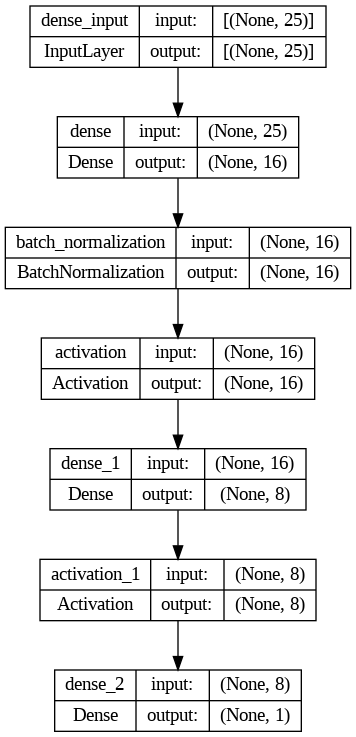

In [ ]:
#7. Plot layers
tf.keras.utils.plot_model(model_sequential, show_shapes=True)

Berdasarkan plot layer tersebut, Sequential API terediri dari 4 layer, yaitu: input layer, hidden layer 1, hidden layer 2, dan output layer. Prosesnya dapat dinarasikan sebagai berikut.
1. input layer menerima input sebanyak 25 jenis dan menghasilkan 25 output dan 1 bias.

  Hasil dari input layer akan diteruskan ke hiden layer 1
2. hiden layer 1 terdiri dari (dense, batch_normalizaton, activation).

  Setelah hidden layer 1 menerima input dari input layer sebanyak 25 feature dan 1 bias. Data tersebut selanjutnya di normalisasi per-batch menggunakan 64 parameter (param:64) dan akan melalui 16 neuron aktivasi menggunakan algoritma elu hingga menghasilkan 16 jenis output dan 1 bias yang akan diteruskan ke layer hidden 2

3. hiden layer 2 terdiri dari (dense, batch_normalizaton, activation).

  Setelah hidden layer 2 menerima input dari hiden layer 1 sebanyak 16 feature dan 1 bias. Data tersebut selanjutnya di normalisasi per-batch menggunakan 136 parameter (param:136) dan akan melalui 8 neuron aktivasi menggunakan algoritma elu hingga menghasilkan 8 jenis output dan 1 bias yang akan diteruskan ke output.

3. hiden layer 2 terdiri dari (dense, batch_normalizaton, activation).

  Setelah output menerima input dari hiden layer 2 sebanyak 8 feature dan 1 bias. input tersebut kemudian akan melalui 1 neuron aktivator dengan algoritma sigmod dan menghasilkan 1 jenis output.

### 6-3 Model Functional API

Rules Model Sequential API:

- Hidden layer inisialisasi: 2
- Hiden layer 1: dense(16)
- hidden layer 2: dense(2)
- activation (elu) karena cepat konvergen
- optimizer (adam)
- menggunakan (batchnormalization)

In [ ]:
#0. Clear Session
seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [ ]:
#1. Definisikan Functional API
input_layer = Input(shape=(25,))

#2.Hidden Layer 1
hidden_layer1 = Dense(32)(input_layer)
normalization_layer1 = BatchNormalization()(hidden_layer1)
activation_layer1 = Activation('elu')(normalization_layer1)

#3.Hidden Layer 2
hidden_layer2 = Dense(16)(activation_layer1)
normalization_layer2 = BatchNormalization()(hidden_layer2)
activation_layer2 = Activation('elu')(normalization_layer2)

#4.Concat Layer
concat_layer = concatenate([activation_layer2, input_layer])
output_layer = Dense(1, activation='sigmoid')(concat_layer)
#5. output model_functional
model_functional = Model(inputs=input_layer, outputs=output_layer)

#6. Compile
model_functional.compile(loss='binary_crossentropy',
                         optimizer= tf.keras.optimizers.Adam(),
                         metrics=[tf.keras.metrics.Recall(),tf.keras.metrics.AUC()])

#7. Early Stoping
es = EarlyStopping(
                      monitor="val_loss",
                      min_delta=0,
                      patience=0,
                      verbose=0,
                      mode="auto",
                      baseline=None,
                      restore_best_weights=False,
                      start_from_epoch=0
                    )

#8. hasil summary
model_functional.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 25)]         0           []                               
                                                                                                  
 dense (Dense)                  (None, 32)           832         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 32)          128         ['dense[0][0]']                  
 alization)                                                                                       
                                                                                                  
 activation (Activation)        (None, 32)           0           ['batch_normalization[0][0]']

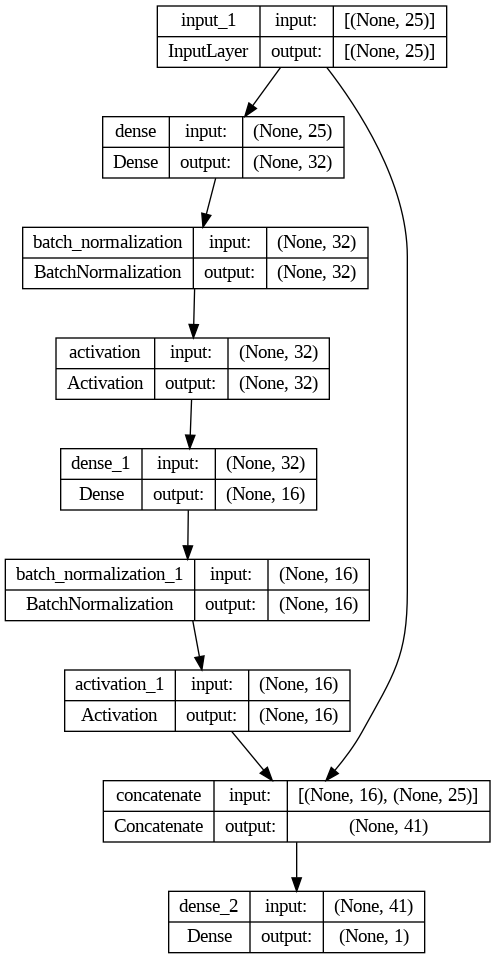

In [ ]:
#8. plot layers
tf.keras.utils.plot_model(model_functional, show_shapes=True)

Functional API terdiri dari 5 layer utama, yaitu: 1 input layer,2 hidden layer, 1 layer concat dan 1 ouput layer.

### 6-4 Model Improvement Sequential API

Berdasarkan hasil evalusi model baseline pada sequential API (8-2), model baseline ini memiliki explode gradient dan terdapat gap antara loss train dan loss validationnya. Oleh karena itu, perlu dilakukan improvement agar model dapat bekerja menjadi lebih baik.

Rules yang digunakan untuk model improvement sequential ini, sebagi berikut:
1. menambahkan drop out pada hidden selanjutnya (hidden ketiga) untuk mengurangi overfit. Dropout dimaksudkan untuk mengurangi jumlah neuron. Semakin sedikit jumlah neuron, semakin simple model yang diolah. ([ref: drop_out](https://towardsdatascience.com/handling-overfitting-in-deep-learning-models-c760ee047c6e))
2. lakukan aktivasi relu. Relu bekerja dengan membatasi threshold neuron, sehingga tidak akan ada nilai negatif karena akan diubah ke nilai nol. Sehingga kompleksitas neuron dapat lebih rendah. ([ref:relu](https://www.shiksha.com/online-courses/articles/relu-and-sigmoid-activation-function/))
3. Menambahkan 1 layer
4. mengganti fungsi optimasi menjadi nadam agar komputasi menjadi lebih cepat([ref: nadam](https://towardsdatascience.com/full-review-on-optimizing-neural-network-training-with-optimizer-9c1acc4dbe78))

In [ ]:
#0. Session
seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [ ]:
#1.Definisi Sequential API

model_sequential_improvement = Sequential()

#2.Hidden Layer 1
model_sequential_improvement.add(Dense(128, input_shape=(25,)))
model_sequential_improvement.add(tf.keras.layers.BatchNormalization())
model_sequential_improvement.add(tf.keras.layers.Activation('relu'))


#3.Hidden Layer 2
model_sequential_improvement.add(Dense(64))
model_sequential_improvement.add(tf.keras.layers.BatchNormalization())
model_sequential_improvement.add(tf.keras.layers.Activation('relu'))

#4.Hidden Layer 3
model_sequential_improvement.add(Dense(32))
model_sequential_improvement.add(tf.keras.layers.BatchNormalization())
model_sequential_improvement.add(tf.keras.layers.Dropout(rate=0.1))
model_sequential_improvement.add(tf.keras.layers.Activation('relu'))

#5.Hidden Layer 4
model_sequential_improvement.add(Dense(16))
model_sequential_improvement.add(tf.keras.layers.BatchNormalization())
model_sequential_improvement.add(tf.keras.layers.Activation('relu'))


#6.Output Layer
model_sequential_improvement.add(Dense(1, activation='sigmoid'))

#7.Compile
model_sequential_improvement.compile(loss='binary_crossentropy',
                         optimizer= tf.keras.optimizers.Nadam(),
                         metrics=[tf.keras.metrics.Recall(),tf.keras.metrics.AUC()])

#8.Early Stoping
es = EarlyStopping(
                      monitor="val_loss",
                      min_delta=0,
                      patience=0,
                      verbose=0,
                      mode="auto",
                      baseline=None,
                      restore_best_weights=False,
                      start_from_epoch=0
                    )

#9.summary model
model_sequential_improvement.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               3328      
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_1 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 64)                0

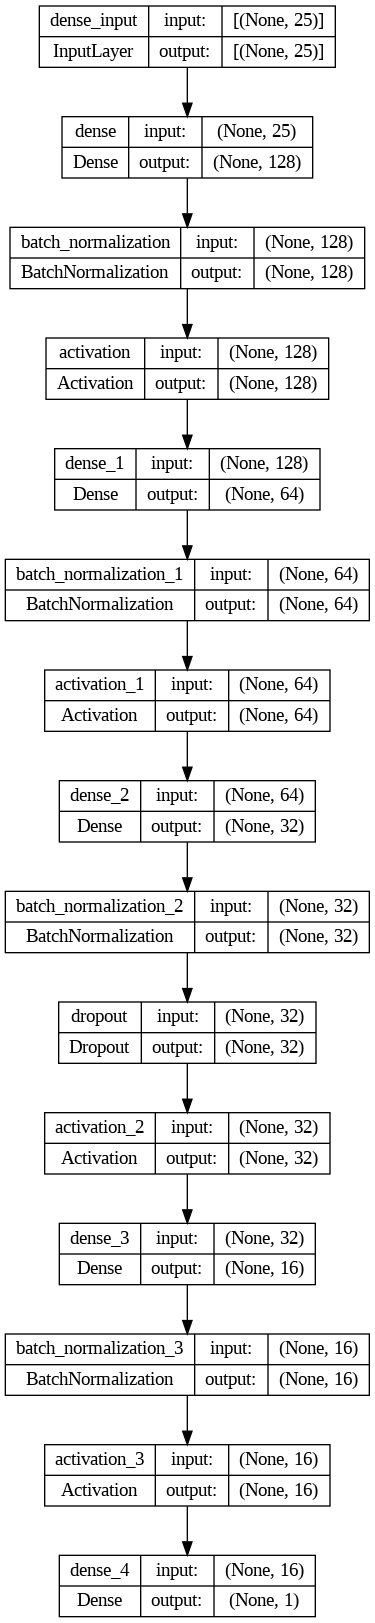

In [ ]:
#10.plot layer
tf.keras.utils.plot_model(model_sequential_improvement, show_shapes=True)

### 6-4 Model Improvement Functional API

Berdasarkan hasil evalusi model baseline pada functional API (8-3), model baseline ini memiliki explode gradient dan terdapat gap antara loss train dan loss validationnya. Oleh karena itu, perlu dilakukan improvement agar model dapat bekerja menjadi lebih baik.

Rules yang digunakan untuk model improvement sequential ini, sebagi berikut:
1. menambahkan drop out pada hidden selanjutnya (hidden ketiga) untuk mengurangi overfit. Dropout dimaksudkan untuk mengurangi jumlah neuron. Semakin sedikit jumlah neuron, semakin simple model yang diolah. (ref:[drop_out](https://towardsdatascience.com/handling-overfitting-in-deep-learning-models-c760ee047c6e))
2. lakukan aktivasi relu. Relu bekerja dengan membatasi threshold neuron, sehingga tidak akan ada nilai negatif karena akan diubah ke nilai nol. Sehingga kompleksitas neuron dapat lebih rendah. (ref:[relu](https://www.shiksha.com/online-courses/articles/relu-and-sigmoid-activation-function/))

3. Menambahkan 1 layer agar model menambah waktu belajar setelah dilakukan dropout (ref:[add_layer](https://stats.stackexchange.com/questions/232969/relation-between-learning-rate-and-number-of-hidden-layers))
4. mengganti fungsi optimasi menjadi nadam agar komputasi menjadi lebih cepat(ref:[nadam](https://towardsdatascience.com/full-review-on-optimizing-neural-network-training-with-optimizer-9c1acc4dbe78))

In [ ]:
#0.Clear Session
seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [ ]:
#1.Definisi Functional API

imp_input_layer = Input(shape=(25,))

#2.Hidden Layer 1
imp_hidden_layer1 = Dense(128)(imp_input_layer)
imp_normalization_layer1 = BatchNormalization()(imp_hidden_layer1)
imp_dropout_layer1 = Dropout(rate=0.1)(imp_normalization_layer1)
imp_activation_layer1 = Activation('relu')(imp_dropout_layer1)

#3.Hidden Layer 2
imp_hidden_layer2 = Dense(64)(imp_activation_layer1)
imp_normalization_layer2 = BatchNormalization()(imp_hidden_layer2)
imp_activation_layer2 = Activation('relu')(imp_normalization_layer2)

#4.Hidden Layer 3
imp_hidden_layer3 = Dense(32)(imp_activation_layer2)
imp_normalization_layer3 = BatchNormalization()(imp_hidden_layer3)
imp_activation_layer3 = Activation('relu')(imp_normalization_layer3)

#5.Hidden Layer 4
imp_hidden_layer4 = Dense(16)(imp_activation_layer3)
imp_normalization_layer4 = BatchNormalization()(imp_hidden_layer4)
imp_activation_layer4 = Activation('relu')(imp_normalization_layer4)


#6.Concat Layer
imp_concat_layer = concatenate([imp_activation_layer4, imp_input_layer])

#7.Output Layer
imp_output_layer = Dense(1, activation='sigmoid')(imp_concat_layer)

model_functional_improvement = Model(inputs=imp_input_layer, outputs=imp_output_layer)

#8. Early Stoping
es = EarlyStopping(
                      monitor="val_loss",
                      min_delta=0,
                      patience=0,
                      verbose=0,
                      mode="auto",
                      baseline=None,
                      restore_best_weights=False,
                      start_from_epoch=0
                    )

#9.Compile
model_functional_improvement.compile(loss='binary_crossentropy',
                         optimizer= tf.keras.optimizers.Nadam(),
                         metrics=[tf.keras.metrics.Recall(),tf.keras.metrics.AUC()])

#10. summary
model_functional_improvement.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 25)]         0           []                               
                                                                                                  
 dense (Dense)                  (None, 128)          3328        ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 128)         512         ['dense[0][0]']                  
 alization)                                                                                       
                                                                                                  
 dropout (Dropout)              (None, 128)          0           ['batch_normalization[0][0]']

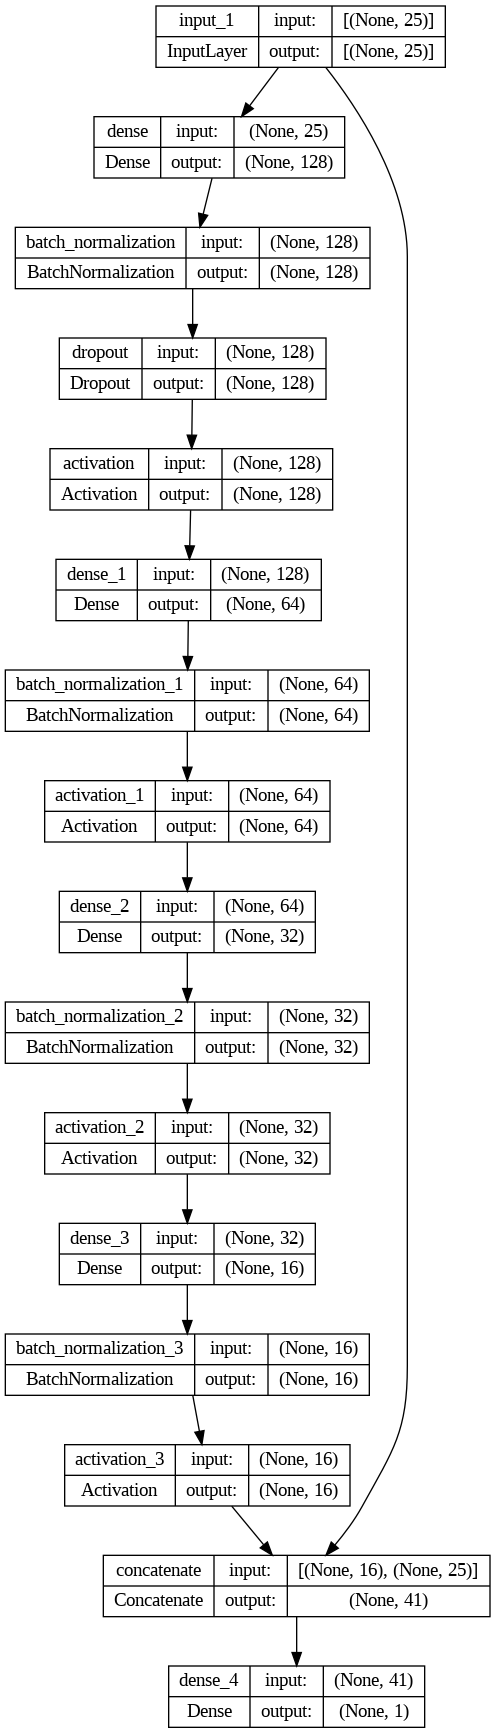

In [ ]:
#11. Plot Layers
tf.keras.utils.plot_model(model_functional_improvement, show_shapes=True)

## 7 - Model Training

### 7-1 Model Sequential API

In [ ]:
#0.Clear Session

seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [ ]:
#1. Train the Model
history_seq = model_sequential.fit(train_pipe, epochs=40,validation_data=val_pipe, callbacks=[es])

Epoch 1/40
1544/1544 [==============================] - 4s 2ms/step - loss: 0.3243 - recall: 0.8622 - auc: 0.9347 - val_loss: 0.3021 - val_recall: 0.8737 - val_auc: 0.9423
Epoch 2/40
1544/1544 [==============================] - 3s 2ms/step - loss: 0.3009 - recall: 0.8796 - auc: 0.9425 - val_loss: 0.2960 - val_recall: 0.8749 - val_auc: 0.9432
Epoch 3/40
1544/1544 [==============================] - 3s 2ms/step - loss: 0.2959 - recall: 0.8834 - auc: 0.9431 - val_loss: 0.2922 - val_recall: 0.8783 - val_auc: 0.9431
Epoch 4/40
1544/1544 [==============================] - 3s 2ms/step - loss: 0.2911 - recall: 0.8817 - auc: 0.9435 - val_loss: 0.2861 - val_recall: 0.8749 - val_auc: 0.9432
Epoch 5/40
1544/1544 [==============================] - 3s 2ms/step - loss: 0.2864 - recall: 0.8821 - auc: 0.9443 - val_loss: 0.2846 - val_recall: 0.8906 - val_auc: 0.9438
Epoch 6/40
1544/1544 [==============================] - 3s 2ms/step - loss: 0.2822 - recall: 0.8855 - auc: 0.9453 - val_loss: 0.2811 - val_r

Training berhenti pada epoch ke 17 karena val loss tidak mengalami penurunan lagi.

### 7-2 Model Functional API

In [ ]:
# Clear Session

seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [ ]:
#Train the Model

history_func = model_functional.fit(train_pipe, epochs=40,validation_data=val_pipe,callbacks=[es])

Epoch 1/40
1544/1544 [==============================] - 7s 2ms/step - loss: 0.3319 - recall: 0.8699 - auc: 0.9299 - val_loss: 0.2980 - val_recall: 0.8711 - val_auc: 0.9422
Epoch 2/40
1544/1544 [==============================] - 3s 2ms/step - loss: 0.2999 - recall: 0.8761 - auc: 0.9419 - val_loss: 0.2930 - val_recall: 0.8771 - val_auc: 0.9433
Epoch 3/40
1544/1544 [==============================] - 3s 2ms/step - loss: 0.2894 - recall: 0.8782 - auc: 0.9441 - val_loss: 0.2830 - val_recall: 0.8796 - val_auc: 0.9450
Epoch 4/40
1544/1544 [==============================] - 3s 2ms/step - loss: 0.2780 - recall: 0.8836 - auc: 0.9472 - val_loss: 0.2730 - val_recall: 0.8783 - val_auc: 0.9488
Epoch 5/40
1544/1544 [==============================] - 3s 2ms/step - loss: 0.2675 - recall: 0.8970 - auc: 0.9521 - val_loss: 0.2613 - val_recall: 0.9042 - val_auc: 0.9544
Epoch 6/40
1544/1544 [==============================] - 3s 2ms/step - loss: 0.2536 - recall: 0.9119 - auc: 0.9575 - val_loss: 0.2326 - val_r

Training berhenti pada epoch ke 12 karena val loss tidak mengalami penurunan lagi.

### 7-3 Model Improvement Sequential API

In [ ]:
# Clear Session

seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [ ]:
# Train the Model

history_seq_improvement = model_sequential_improvement.fit(train_pipe, epochs=40,validation_data=val_pipe,callbacks=[es])

Epoch 1/40
1544/1544 [==============================] - 9s 4ms/step - loss: 0.2946 - recall: 0.8644 - auc: 0.9406 - val_loss: 0.2643 - val_recall: 0.8554 - val_auc: 0.9464
Epoch 2/40
1544/1544 [==============================] - 5s 3ms/step - loss: 0.2606 - recall: 0.8974 - auc: 0.9535 - val_loss: 0.2185 - val_recall: 0.9144 - val_auc: 0.9662
Epoch 3/40
1544/1544 [==============================] - 5s 4ms/step - loss: 0.2225 - recall: 0.9303 - auc: 0.9654 - val_loss: 0.1814 - val_recall: 0.9546 - val_auc: 0.9710
Epoch 4/40
1544/1544 [==============================] - 5s 3ms/step - loss: 0.2094 - recall: 0.9276 - auc: 0.9682 - val_loss: 0.1780 - val_recall: 0.9580 - val_auc: 0.9714
Epoch 5/40
1544/1544 [==============================] - 5s 3ms/step - loss: 0.2033 - recall: 0.9294 - auc: 0.9693 - val_loss: 0.1841 - val_recall: 0.9292 - val_auc: 0.9715


Training berhenti pada epoch ke 5 karena val loss tidak mengalami penurunan lagi

### 7-4 Model Improvement Functional API

In [ ]:
# Clear Session
seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [ ]:
# Train the Model

history_func_improvement = model_functional_improvement.fit(train_pipe, epochs=40,validation_data=val_pipe,callbacks=[es])

Epoch 1/40
1544/1544 [==============================] - 10s 4ms/step - loss: 0.3090 - recall: 0.8609 - auc: 0.9364 - val_loss: 0.2633 - val_recall: 0.8444 - val_auc: 0.9476
Epoch 2/40
1544/1544 [==============================] - 6s 4ms/step - loss: 0.2727 - recall: 0.8769 - auc: 0.9487 - val_loss: 0.2413 - val_recall: 0.8991 - val_auc: 0.9598
Epoch 3/40
1544/1544 [==============================] - 5s 3ms/step - loss: 0.2288 - recall: 0.9210 - auc: 0.9638 - val_loss: 0.1914 - val_recall: 0.9508 - val_auc: 0.9710
Epoch 4/40
1544/1544 [==============================] - 6s 4ms/step - loss: 0.2050 - recall: 0.9308 - auc: 0.9694 - val_loss: 0.1830 - val_recall: 0.9381 - val_auc: 0.9717
Epoch 5/40
1544/1544 [==============================] - 5s 3ms/step - loss: 0.1986 - recall: 0.9323 - auc: 0.9708 - val_loss: 0.1749 - val_recall: 0.9474 - val_auc: 0.9715
Epoch 6/40
1544/1544 [==============================] - 5s 3ms/step - loss: 0.1921 - recall: 0.9362 - auc: 0.9721 - val_loss: 0.1724 - val_

Training berhenti pada epoch ke 8 karena val loss tidak mengalami penurunan lagi.

## 8- Model Evaluation

### 8-1 Model Sequential API

Sebelum melakukan evaluasi, ubah data hisory model sequencial menjadi dataframe agar memudahkan pembacaan.

In [ ]:
# Create DataFrame
history_seq_df = pd.DataFrame(history_seq.history)
#tampilkan 5 history terbawah
history_seq_df.tail(5)

,loss,recall,auc,val_loss,val_recall,val_auc
12,0.235504,0.912320,0.962686,0.220163,0.935566,0.965972
13,0.231292,0.914969,0.963579,0.210678,0.927936,0.967769
14,0.225525,0.915939,0.964727,0.204401,0.921577,0.968753
15,0.223139,0.917021,0.965265,0.198311,0.910555,0.970041
16,0.222236,0.916088,0.965541,0.202035,0.937262,0.969226


(0.0, 1.0)

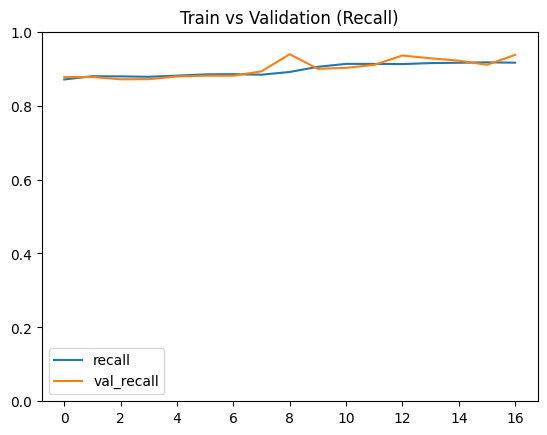

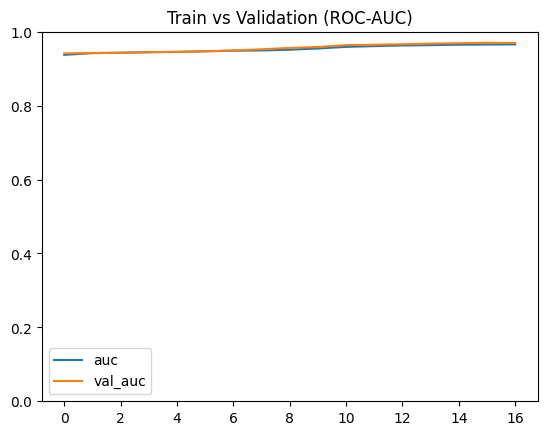

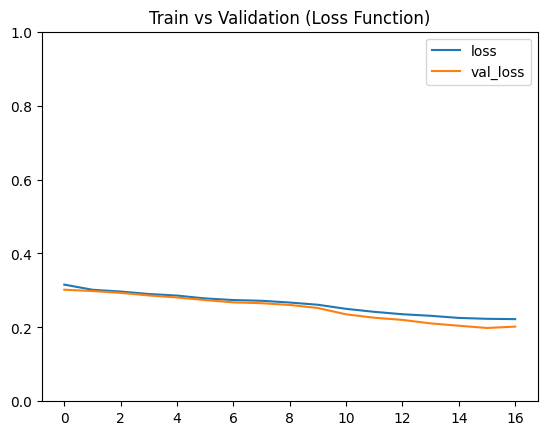

In [ ]:
# Plot Traning Results
history_seq_df[['recall', 'val_recall']].plot(title='Train vs Validation (Recall)')
plt.ylim(0,1)
history_seq_df[['auc', 'val_auc']].plot(title='Train vs Validation (ROC-AUC)')
plt.ylim(0,1)
history_seq_df[['loss', 'val_loss']].plot(title='Train vs Validation (Loss Function)')
plt.ylim(0,1)

Observasi:

- Berdasarkan data 5 hasil terakhir, nilai recall pada train set dan val set cukup tinggi yang masing-masing bernilai (0.91 dan 0.93)
- sementara jika dilihat dari plot, terjadi explode gradient (nilai naik turun) pada train set. Oleh karena itu, perlu dilakukan regularisasi/dropout.
- Nilai ROC pada train dan validation cukup tinggi dan berdasarkan plot, garis keduanya saling berdekatan, mendatar dan stabil. hal ini berarti model stabil dalam menghitung nilai ROC-AUC
- nilai loss pada train dan validation set cukup baik dan rendah yang bernilai (0.22 dan 0.20). Berdasarkan plotnya, garis antara train dan validation cukup dekat dan mendatar. Berarti model ini dapat mengklasifikasi churn customer dengan baik

In [ ]:
# Model Evaluation of test-set
y_pred_seq = model_sequential.predict(X_test_final)
y_pred_seq = np.where(y_pred_seq >= 0.5, 1, 0)

print(classification_report(y_test, y_pred_seq))

174/174 [==============================] - 0s 843us/step
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      2608
           1       0.92      0.88      0.90      2939

    accuracy                           0.90      5547
   macro avg       0.90      0.90      0.90      5547
weighted avg       0.90      0.90      0.90      5547



In [ ]:
#Perhitungan ROC-AUC Test

auc_seq = roc_auc_score(y_test, y_pred_seq)
auc_seq

0.8994257207388683

***Observasi:***

Setelah dilakukan pengetesan, didapatkan bahwa:
- nilai recall hasil test tidak secara signifikan berbeda dengan recall test.
  - recall train: 0.92
  - recall test: 0.88

  Karena tidak berbeda secara signifikan, model ini cukup baik dalam memprediksi churn dan not churn, namun masuk kedalam kategori overfitting.

- AUC test benilai 0.89, hal ini berarti model tidak dipengaruhi oleh threshold. Model dapat mengklasifikasikan negatif dan positif churn dengan baik.

In [ ]:
#variabel Act vs Pred
act_pred_seq = pd.DataFrame({
            'actual' : y_test,
            'prediction' : np.ndarray.flatten(y_pred_seq)
})
df_act_pred_seq = pd.concat([X_test, act_pred_seq],axis=1)

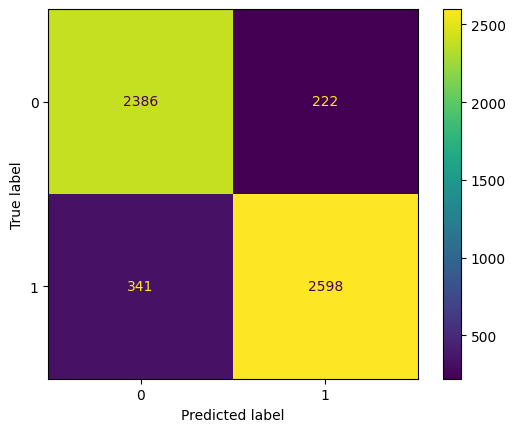

In [ ]:
# Confusion Matrix
cm_test_seq = confusion_matrix(y_test, y_pred_seq)
ConfusionMatrixDisplay(cm_test_seq).plot()

***Observasi:***

- Berdasarkan conffusion matrix, model lebih cenderung memprediksi `churn` dengan customer yang terdeteksi tidak churn padahal churn sebanyak 341 customer (0.061%). Sementara customer yang terprediksi churn namun sebenarnya tidak churn sebanyak 222 (0.40%).
- Karena salah klasifikasi ini, dapat berpotensi kehilangan customer hingga 10%

### 8-2 Model Functional API

In [ ]:
# Create DataFrame
history_func_df = pd.DataFrame(history_func.history)
history_func_df.tail(5)

,loss,recall,auc,val_loss,val_recall,val_auc
5,0.246033,0.921386,0.960312,0.226127,0.921153,0.965343
6,0.224268,0.930304,0.965932,0.209911,0.910555,0.968069
7,0.213347,0.929147,0.968120,0.201929,0.954218,0.968913
8,0.211159,0.931162,0.968587,0.199497,0.925392,0.968612
9,0.209316,0.931311,0.969057,0.199744,0.955914,0.968394


(0.0, 1.0)

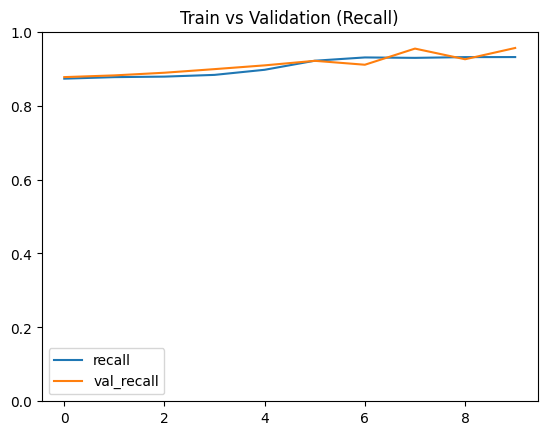

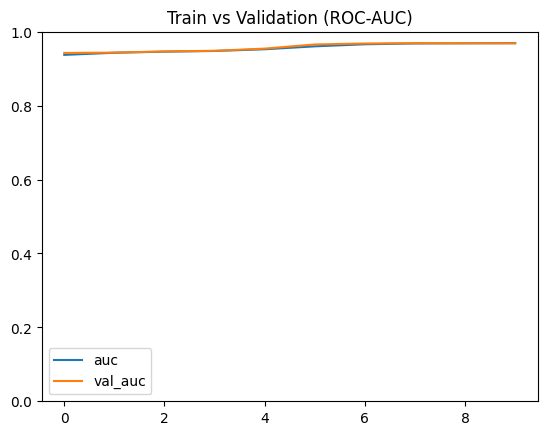

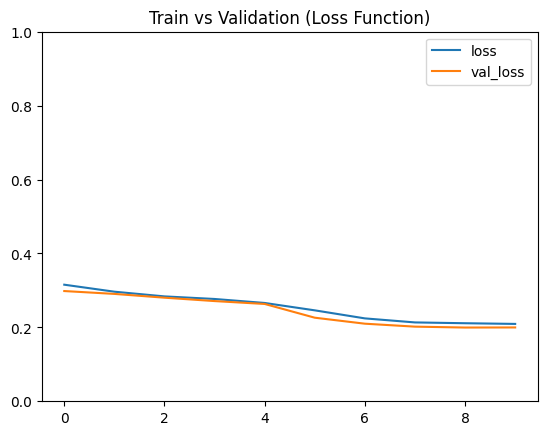

In [ ]:
# Plot Traning Results

history_func_df[['recall', 'val_recall']].plot(title='Train vs Validation (Recall)')
plt.ylim(0,1)
history_func_df[['auc', 'val_auc']].plot(title='Train vs Validation (ROC-AUC)')
plt.ylim(0,1)
history_func_df[['loss', 'val_loss']].plot(title='Train vs Validation (Loss Function)')
plt.ylim(0,1)

***Observasi:***

- Berdasarkan data 5 hasil terakhir histori, nilai recall pada train set dan val set cukup tinggi yang masing-masing bernilai (0.93 dan 0.95)
- sementara sama halnya dengan model sequential, berdasarkan plotnya garis train dan validationnya mengalami explode gradient (nilai naik turun). Oleh karena itu, perlu dilakukan regularisasi/dropout.
- Nilai ROC pada train dan validation cukup tinggi dan berdasarkan plot, garis keduanya saling berdekatan, mendatar dan stabil. hal ini berarti model stabil dalam menghitung nilai ROC-AUC
- nilai loss pada train dan validation set cukup baik dan rendah yang bernilai (0.21 dan 0.19). Berdasarkan plotnya, garis antara train dan validation cukup dekat dan mendatar. Berarti model ini dapat mengklasifikasi churn customer dengan baik

In [ ]:
# Evaluate Test-Set

y_pred_func = model_functional.predict(X_test_final)
y_pred_func = np.where(y_pred_func >=0.01, 1, 0)

print(classification_report(y_test, y_pred_func))

174/174 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.91      0.59      0.71      2608
           1       0.72      0.95      0.82      2939

    accuracy                           0.78      5547
   macro avg       0.81      0.77      0.77      5547
weighted avg       0.81      0.78      0.77      5547



In [ ]:
#Perhitungan ROC-AUC Test

auc_func = roc_auc_score(y_test, y_pred_func)
auc_func

0.7665968637343781

***Observasi:***

Setelah dilakukan pengetesan, didapatkan bahwa:
- nilai recall hasil test tidak secara signifikan berbeda dengan recall test.
  - recall train: 0.93
  - recall test: 0.95

  Karena tidak berbeda secara signifikan, model ini adalah goodfit.

- AUC test benilai 0.76, hal ini berarti model dipengaruhi oleh threshold
- tingkat akurasi yang dimiliki model ini cukup baik yaitu sebesar 80%

In [ ]:
#Act vs Pred
act_pred_func = pd.DataFrame({
            'actual' : y_test,
            'prediction' : np.ndarray.flatten(y_pred_func)
})
df_act_pred_func = pd.concat([X_test, act_pred_func],axis=1)

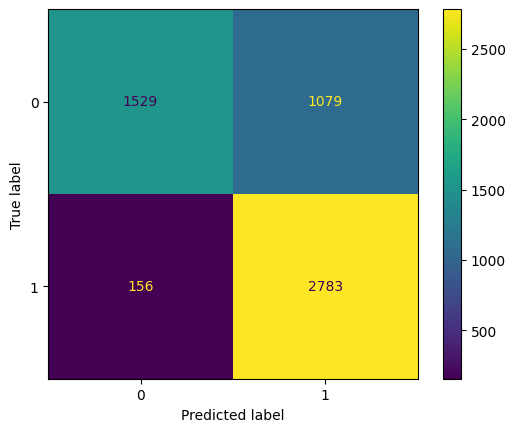

In [ ]:
# Confusion Matrix
cm_test_func = confusion_matrix(y_test, y_pred_func)
ConfusionMatrixDisplay(cm_test_func).plot()

***Observasi:***

- Berdasarkan confussion matrix, model lebih cenderung memprediksi `tidak churn`. Customer yang terdeteksi tidak churn padahal churn sebanyak 1079 customer (0.19%). Sementara customer yang terprediksi churn namun sebenarnya tidak churn sebanyak 156 (0.28%).
- Karena salah klasifikasi ini, dapat berpotensi kehilangan customer hingga 22%

### 8-3 Model Improvement Sequential API

In [ ]:
# Create DataFrame

history_seq_improvement_df = pd.DataFrame(history_seq_improvement.history)
history_seq_improvement_df.tail(5)

,loss,recall,auc,val_loss,val_recall,val_auc
3,0.204641,0.931460,0.968835,0.176720,0.945740,0.972111
4,0.199212,0.929968,0.970411,0.176100,0.908012,0.971969
5,0.192916,0.933102,0.971553,0.173692,0.954642,0.971695
6,0.190989,0.933736,0.971596,0.172696,0.958881,0.972140
7,0.187105,0.933102,0.972657,0.174274,0.955914,0.972030


(0.0, 1.0)

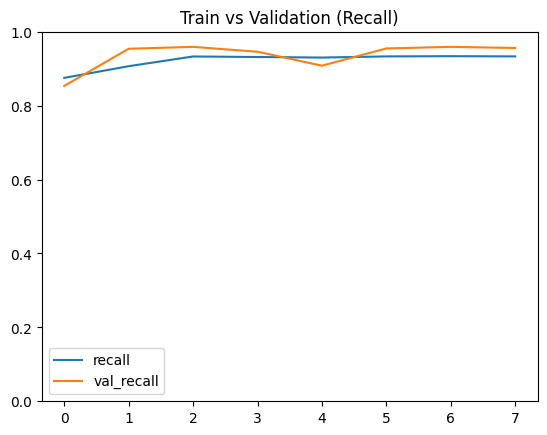

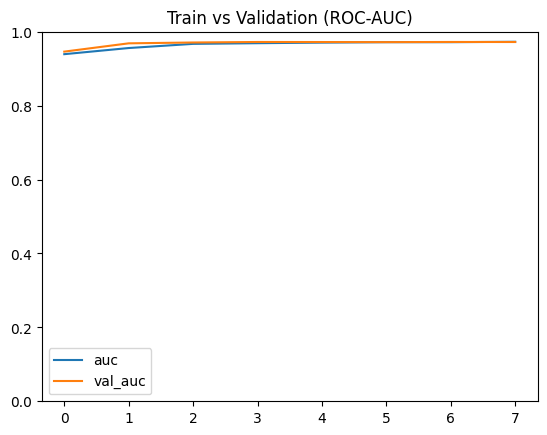

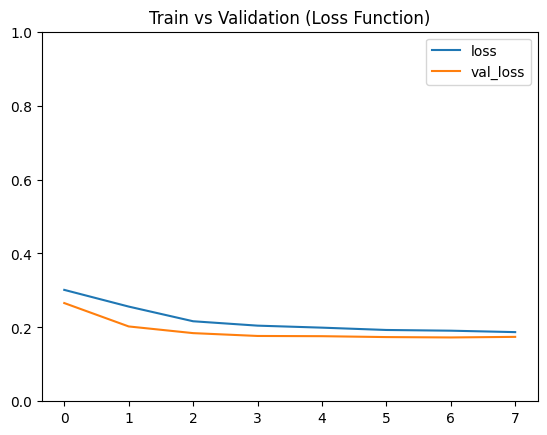

In [ ]:
# Plot Traning Results

history_seq_improvement_df[['recall', 'val_recall']].plot(title='Train vs Validation (Recall)')
plt.ylim(0,1)
history_seq_improvement_df[['auc', 'val_auc']].plot(title='Train vs Validation (ROC-AUC)')
plt.ylim(0,1)
history_seq_improvement_df[['loss', 'val_loss']].plot(title='Train vs Validation (Loss Function)')
plt.ylim(0,1)

***Observasi:***

- Berdasarkan data 5 hasil terakhir histori, nilai recall pada train set dan val set cukup tinggi yang masing-masing bernilai (0.93 dan 0.95)
- Berdasarkan plotnya, setelah dilakukan improvement recall pada train dan validation terlihat lebih stabil dibandingkan model baseline.
- Nilai ROC pada train dan validation cukup tinggi dan berdasarkan plot, garis keduanya saling berdekatan, mendatar dan stabil. Hal ini berarti model stabil dalam menghitung nilai ROC-AUC
- nilai loss pada train dan validation set menjadi lebih rendah yang bernilai (0.18 dan 0.17). Berdasarkan plotnya, garis loss antara train dan validation semakin lama semakin mendekat antara satu sama lain. Hal ini berarti, model dapat mengklasifikasikan churn dengan lebih baik

In [ ]:
# Model Evaluation of test-set

y_pred_seq_improvement = model_sequential_improvement.predict(X_test_final)
y_pred_seq_improvement = np.where(y_pred_seq_improvement >= 0.5, 1, 0)

print(classification_report(y_test, y_pred_seq_improvement))

174/174 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.89      0.90      0.90      2608
           1       0.91      0.90      0.91      2939

    accuracy                           0.90      5547
   macro avg       0.90      0.90      0.90      5547
weighted avg       0.90      0.90      0.90      5547



In [ ]:
#Perhitungan ROC-AUC Test

auc_seq_imp = roc_auc_score(y_test, y_pred_seq_improvement)
auc_seq_imp

0.9016053282803509

In [ ]:
# Act vs Pred
act_pred_seq_imp = pd.DataFrame({
            'actual' : y_test,
            'prediction' : np.ndarray.flatten(y_pred_seq_improvement)
})
df_act_pred_seq_imp = pd.concat([X_test, act_pred_seq_imp],axis=1)

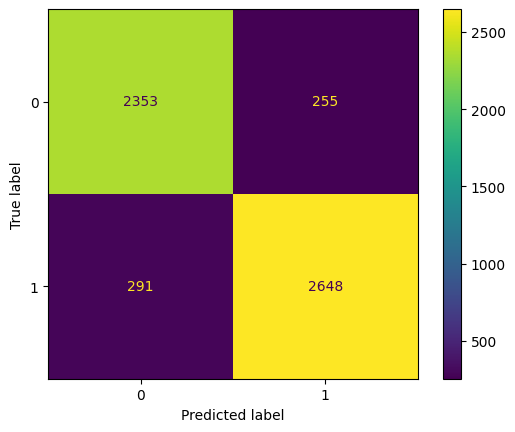

In [ ]:
# Confusion Matrix
cm_test_seq_imp = confusion_matrix(y_test, y_pred_seq_improvement)
ConfusionMatrixDisplay(cm_test_seq_imp).plot()

***Observasi:***

- Berdasarkan confussion matrix, model lebih cenderung memprediksi `churn`.Customer yang terdeteksi tidak churn padahal churn sebanyak 291 customer (0.045%). Sementara customer yang terprediksi churn namun sebenarnya tidak churn sebanyak 255 (0.053%).
- Karena salah klasifikasi ini, dapat berpotensi kehilangan customer hingga 10%
- Nilai AUC pada model ini adalah sebesar 0.89 sehingga dapat disimpulkan bahwa model tidak dipengaruhi oleh threshold. Semakin besar nilai AUC semakin baik model ini memprediksi false negatif dan false positiv

### 8-4 Model Improvement Functional API

In [ ]:
#buat dataframe
history_func_improvement_df = pd.DataFrame(history_func_improvement.history)
history_func_improvement_df.tail(5)

,loss,recall,auc,val_loss,val_recall,val_auc
3,0.207396,0.929558,0.969030,0.186247,0.913947,0.970379
4,0.195234,0.933438,0.971386,0.179549,0.912251,0.971282
5,0.193861,0.933102,0.971324,0.178125,0.948283,0.970983
6,0.189235,0.935378,0.972299,0.173135,0.928359,0.971042
7,0.188085,0.935751,0.972490,0.176386,0.940229,0.971985


(0.0, 1.0)

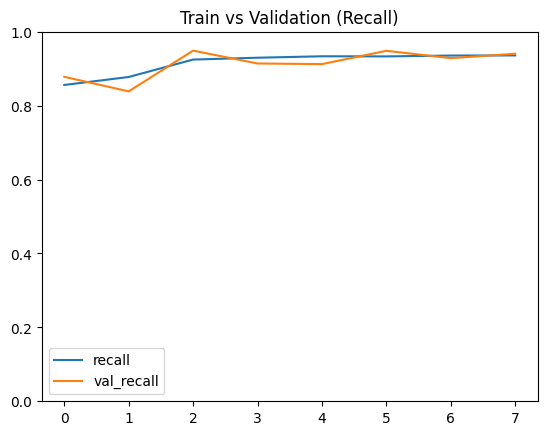

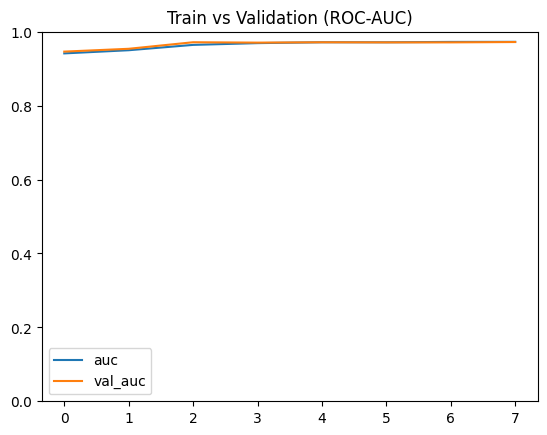

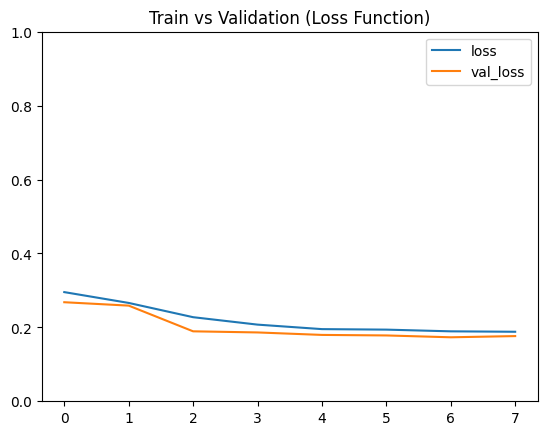

In [ ]:
# Plot Traning Results

history_func_improvement_df[['recall', 'val_recall']].plot(title='Train vs Validation (Recall)')
plt.ylim(0,1)
history_func_improvement_df[['auc', 'val_auc']].plot(title='Train vs Validation (ROC-AUC)')
plt.ylim(0,1)
history_func_improvement_df[['loss', 'val_loss']].plot(title='Train vs Validation (Loss Function)')
plt.ylim(0,1)

In [ ]:
# Evaluate Test-Set
y_pred_func_improvement = model_functional_improvement.predict(X_test_final)
y_pred_func_improvement = np.where(y_pred_func_improvement >=0.5, 1, 0)

print(classification_report(y_test, y_pred_func_improvement))

174/174 [==============================] - 0s 941us/step
              precision    recall  f1-score   support

           0       0.87      0.92      0.90      2608
           1       0.92      0.88      0.90      2939

    accuracy                           0.90      5547
   macro avg       0.90      0.90      0.90      5547
weighted avg       0.90      0.90      0.90      5547



***Observasi:***

- Berdasarkan data 5 hasil terakhir histori, nilai recall pada train set dan val set cukup tinggi yang masing-masing bernilai (0.93 dan 0.94). Sementara itu, berdasarkan plotnya, garisnya sudah lebih stabil
- Nilai ROC pada train dan validation cukup tinggi dan berdasarkan plot, garis keduanya saling berdekatan, mendatar dan stabil. hal ini berarti model stabil dalam menghitung nilai ROC-AUC.
- nilai loss pada train dan validation set cukup baik dan rendah yang bernilai (0.18 dan 0.17). Berdasarkan plotnya, garis antara train dan validation cukup dekat dan mendatar. Berarti model ini dapat mengklasifikasi churn customer dengan baik

In [ ]:
#Perhitungan ROC-AUC Test

auc_func_imp = roc_auc_score(y_test, y_pred_func_improvement)
auc_func_imp

0.9006623950803349

In [ ]:
#Act vs Pred
act_pred_func_imp = pd.DataFrame({
            'actual' : y_test,
            'prediction' : np.ndarray.flatten(y_pred_func_improvement)
})
df_act_pred_func_imp = pd.concat([X_test, act_pred_func_imp],axis=1)

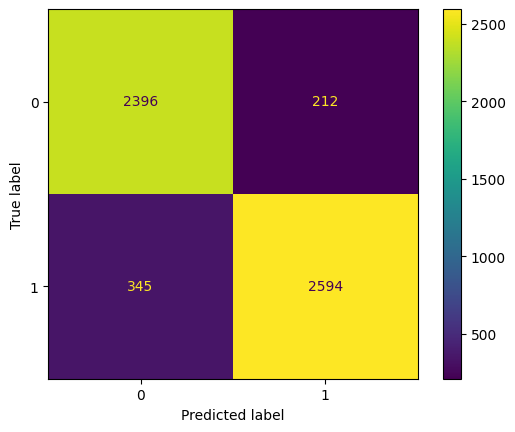

In [ ]:
# Confusion Matrix
cm_test_func_imp = confusion_matrix(y_test, y_pred_func_improvement)
ConfusionMatrixDisplay(cm_test_func_imp).plot()

***Observasi:***

- Berdasarkan confussion matrix, model lebih cenderung memprediksi `churn`.Customer yang terdeteksi tidak churn padahal churn sebanyak 345 customer (0.043%). Sementara customer yang terprediksi churn namun sebenarnya tidak churn sebanyak 212 (0.059%).
- Karena salah klasifikasi ini, dapat berpotensi kehilangan customer hingga 10.29%

### 8-5 Model Sequential API vs Model Improvement Sequential API

In [ ]:
# Hasil Training

seq_training_df = pd.concat([pd.DataFrame(history_seq_df.iloc[-1]).rename(columns={16:'sequential'}),pd.DataFrame(history_seq_improvement_df.iloc[-1]).rename(columns={7 :'sequential_improvement'})],axis=1).T
seq_training_df

,loss,recall,auc,val_loss,val_recall,val_auc
sequential,0.222236,0.916088,0.965541,0.202035,0.937262,0.969226
sequential_improvement,0.187105,0.933102,0.972657,0.174274,0.955914,0.972030


In [ ]:
#Pembuatan list kolom performansi semua model
seq_accu = [accuracy_score(y_test, y_pred_seq),accuracy_score(y_test, y_pred_seq_improvement)]
seq_recall = [recall_score(y_test, y_pred_seq),recall_score(y_test, y_pred_seq_improvement)]
seq_f1 = [f1_score(y_test, y_pred_seq),f1_score(y_test, y_pred_seq_improvement)]
seq_auc =[auc_seq, auc_seq_imp]

In [ ]:
#Membuat dataframe performansi
df_seq_eval = pd.DataFrame([seq_accu, seq_f1, seq_recall, seq_auc], index=['Accuracy','F1','Recall','AUC'], columns=['sequential', 'sequential_improvement']).T

In [ ]:
# Hasil Test-Set
df_seq_eval = df_seq_eval
df_seq_eval

,Accuracy,F1,Recall,AUC
sequential,0.898504,0.902240,0.883974,0.899426
sequential_improvement,0.901568,0.906539,0.900987,0.901605


***Observasi:***

Berdasarkan informasi diatas, hasil model improvement didapatkan bahwa:
- pada model improvement, tingkat loss menurun hingga 0.04
- nilai recall dan validation training meningkat masing-masing mengalami peningkatan hingga 0.02 dan 0.02.
- nilai AUC training-validation terjadi peningkatan hingga 0.1
- hasil test model improvement mengalami peningkatan dan model menjadi lebih baik untuk tingkat accuracy, F1, Recall hingga AUC

Hal ini berarti, model improvement berhasil melakukan peningkatan dan memiliki peformansi lebih baik daripada baseline.

### 8-6 Model Functional API vs Model Improvement Functional API

In [ ]:
# Hasil Training

func_training_df = pd.concat([pd.DataFrame(history_func_df.iloc[-1]).rename(columns={13 :'functional'}),pd.DataFrame(history_func_improvement_df.iloc[-1]).rename(columns={4 :'functional_improvement'})],axis=1).T
func_training_df

,loss,recall,auc,val_loss,val_recall,val_auc
9,0.209316,0.931311,0.969057,0.199744,0.955914,0.968394
7,0.188085,0.935751,0.972490,0.176386,0.940229,0.971985


In [ ]:
#Pembuatan list kolom performansi semua model
func_accu = [accuracy_score(y_test, y_pred_func),accuracy_score(y_test, y_pred_func_improvement)]
func_recall = [recall_score(y_test, y_pred_func),recall_score(y_test, y_pred_func_improvement)]
func_f1 = [f1_score(y_test, y_pred_func),f1_score(y_test, y_pred_func_improvement)]
func_auc =[auc_func, auc_func_imp]

In [ ]:
#Membuat dataframe performansi
df_func_eval = pd.DataFrame([func_accu, func_f1, func_recall, func_auc], index=['Accuracy','F1','Recall','AUC'], columns=['functional', 'functional_improvement']).T

In [ ]:
# Hasil Test-Set
df_func_eval = df_func_eval.round(decimal=4)
df_func_eval

<bound method DataFrame.round of                         Accuracy        F1    Recall       AUC
functional              0.777357  0.818409  0.946921  0.766597
functional_improvement  0.899585  0.903046  0.882613  0.900662>

***Observasi:***

Berdasarkan informasi diatas, hasil model improvement didapatkan bahwa:
- pada model improvement, tingkat loss menurun hingga 0.02
- nilai recall meningkat hingga 0.01, namun pada validation terjadi penurunan
- nilai AUC training-validation terjadi peningkatan hingga 0.1
- hasil test model improvement mengalami peningkatan dan model menjadi lebih baik untuk tingkat accuracy, F1, dan AUC, namun tidak pada nilai recall yang turun hingga 0.06

Hal ini berarti, model improvement berhasil melakukan peningkatan dan memiliki peformansi yang lebih baik daripada baseline, namun dalam menentukan churn model basement memiliki tingkat recall lebih tinggi.

### 8-7 Model Selection

Berdasarkan analisis yang telah dilakukan, model terbaik adalah ***model_sequential_improvement***.

## 9-Model Saving

Selanjutnya dilakukan penyimpanan model terbaik dan dilakukan freeze pada model tersebut agar tidak dapat diubah-ubah lagi datanya.

In [ ]:
# Summary of Model Sequential

model_sequential_improvement.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               3328      
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_1 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 64)                0

In [ ]:
# Freeze Model

model_sequential_improvement.trainable = False
model_sequential_improvement.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               3328      
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_1 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 64)                0

In [ ]:
# Model Saving
with open('preprocessor_churn.pkl', 'wb') as file_1:
  pickle.dump(preprocessor, file_1)

model_sequential_improvement.save('churn_best_model.h5')

## 10-Model Inference

Model inference dikerjakan dinotebook [h8dsft_P2M1_desti_ratna_komala_inference.ipynb](https://github.com/H8-Assignments-Bay/p2-ftds020-rmt-ml1-destiratnakomala/blob/main/h8dsft_P2M1_desti_ratna_komala_inference.ipynb)

## 11-Kesimpulan

Berdaaarkan pemodelan yang telah dilakukan, model improvement sequential API merupakan model terbaik dalam memprediksi apakah customer akan churn atau tidak. Selain itu, pemodelan ini memiliki recall yang tinggi (90%) baik dalam menprediksi customer yang churn maupun yang tidak churn. Meskipun demikian, kemungkinan persen kesalahan prediksi dapat mencapai 10%, sehingga jika pemodelan ini digunakan, perusahaan tetap harus mengecek ulang apakah customer tersebut benar-benar churn atau tidak.